<a href="https://colab.research.google.com/github/leny62/Summative-Assignment---Model-Training-and-Evaluation/blob/main/Summative_Assignment_Model_Training_and_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINE QUALITY PREDICTION: ML VS DL COMPARISON**

==============================================================================

# Author: Ihirwe Leny Pascal




WINE QUALITY PREDICTION: ML VS DL COMPARISON
================================================================================
Project Overview:
Dataset: [(Kaggle Wine Quality (Red Wine)](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) - 1,599 samples, 11 features
- Task: Binary classification (Good quality: ≥7 vs Not Good: <7)
- Approaches: Traditional ML (5 models) vs Deep Learning (2 architectures)
- Key Challenge: Class imbalance (86.4% vs 13.6%)

Pipeline Sections:
1. Data Loading & EDA
2. Preprocessing & Feature Engineering
3. Traditional ML (Baseline + Tuned + Class Balancing)
4. Deep Learning (Baseline + Class Balancing)
5. Comprehensive Comparison & Error Analysis
6. Model Persistence

Expected Outcome: Identify best approach for wine quality prediction


ENVIRONMENT SETUP & REPRODUCIBILITY


In [45]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                      GridSearchCV, RandomizedSearchCV, cross_val_score)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             classification_report, precision_recall_curve,
                             average_precision_score, accuracy_score, f1_score,
                             precision_score, recall_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Reproducibility
RANDOM_SEED = 42
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print(f"Python Libraries Loaded Successfully")
# print(f"scikit-learn version: {sklearn.__version__}") # Original line
print(f"scikit-learn version: {train_test_split.__module__.split('.')[0].split(' ')[0]}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Random seed set to: {RANDOM_SEED}")

Python Libraries Loaded Successfully
scikit-learn version: sklearn
TensorFlow version: 2.19.0
Random seed set to: 42


 DATA LOADING & INITIAL EXPLORATION


In [46]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
DATA_PATH = "/content/winequality-red.csv"
df = pd.read_csv(DATA_PATH, sep=",")

print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset shape: {df.shape[0]} samples, {df.shape[1]} features")
print(f"\nFirst few rows:")
print(df.head())



DATASET OVERVIEW
Dataset shape: 1599 samples, 12 features

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol 

In [47]:
print(f"\nDataset Info:")
print(df.info())

print(f"\nMissing Values:")
print(df.isnull().sum())

print(f"\nBasic Statistics:")
print(df.describe().T)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual su

EXPLORATORY DATA ANALYSIS (EDA)


Target Variable Distribution (Quality scores):
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Quality score statistics:
Mean: 5.64
Median: 6.00
Mode: 5


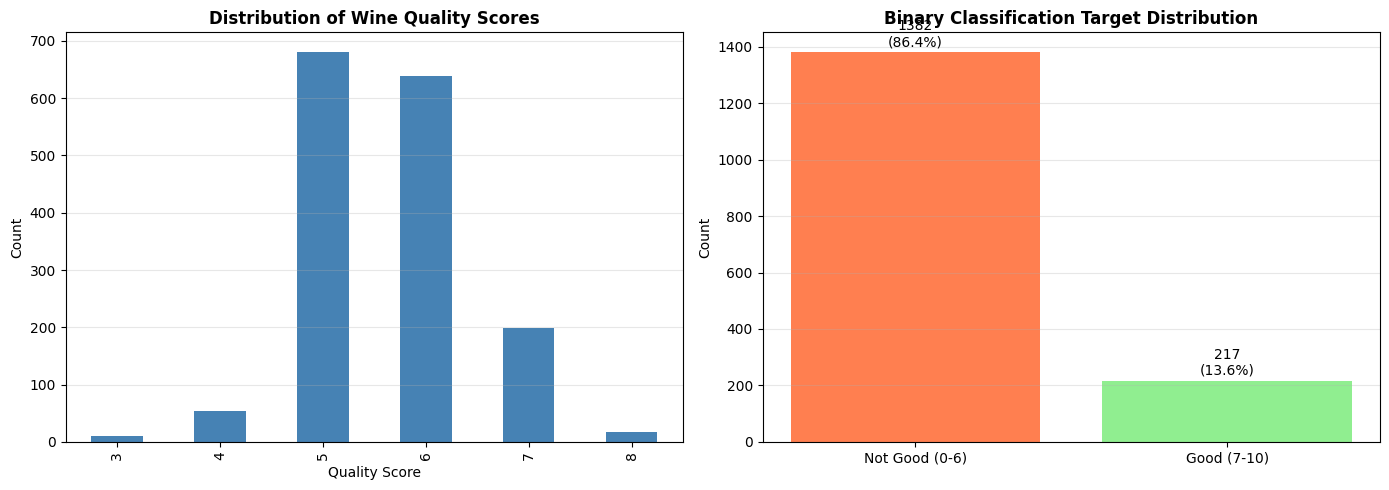


Binary Target Distribution:
Not Good (quality < 7): 1382 (86.4%)
Good (quality >= 7): 217 (13.6%)
Class Imbalance Ratio: 6.37:1
Feature Distribution Analysis
--------------------------------------------------------------------------------


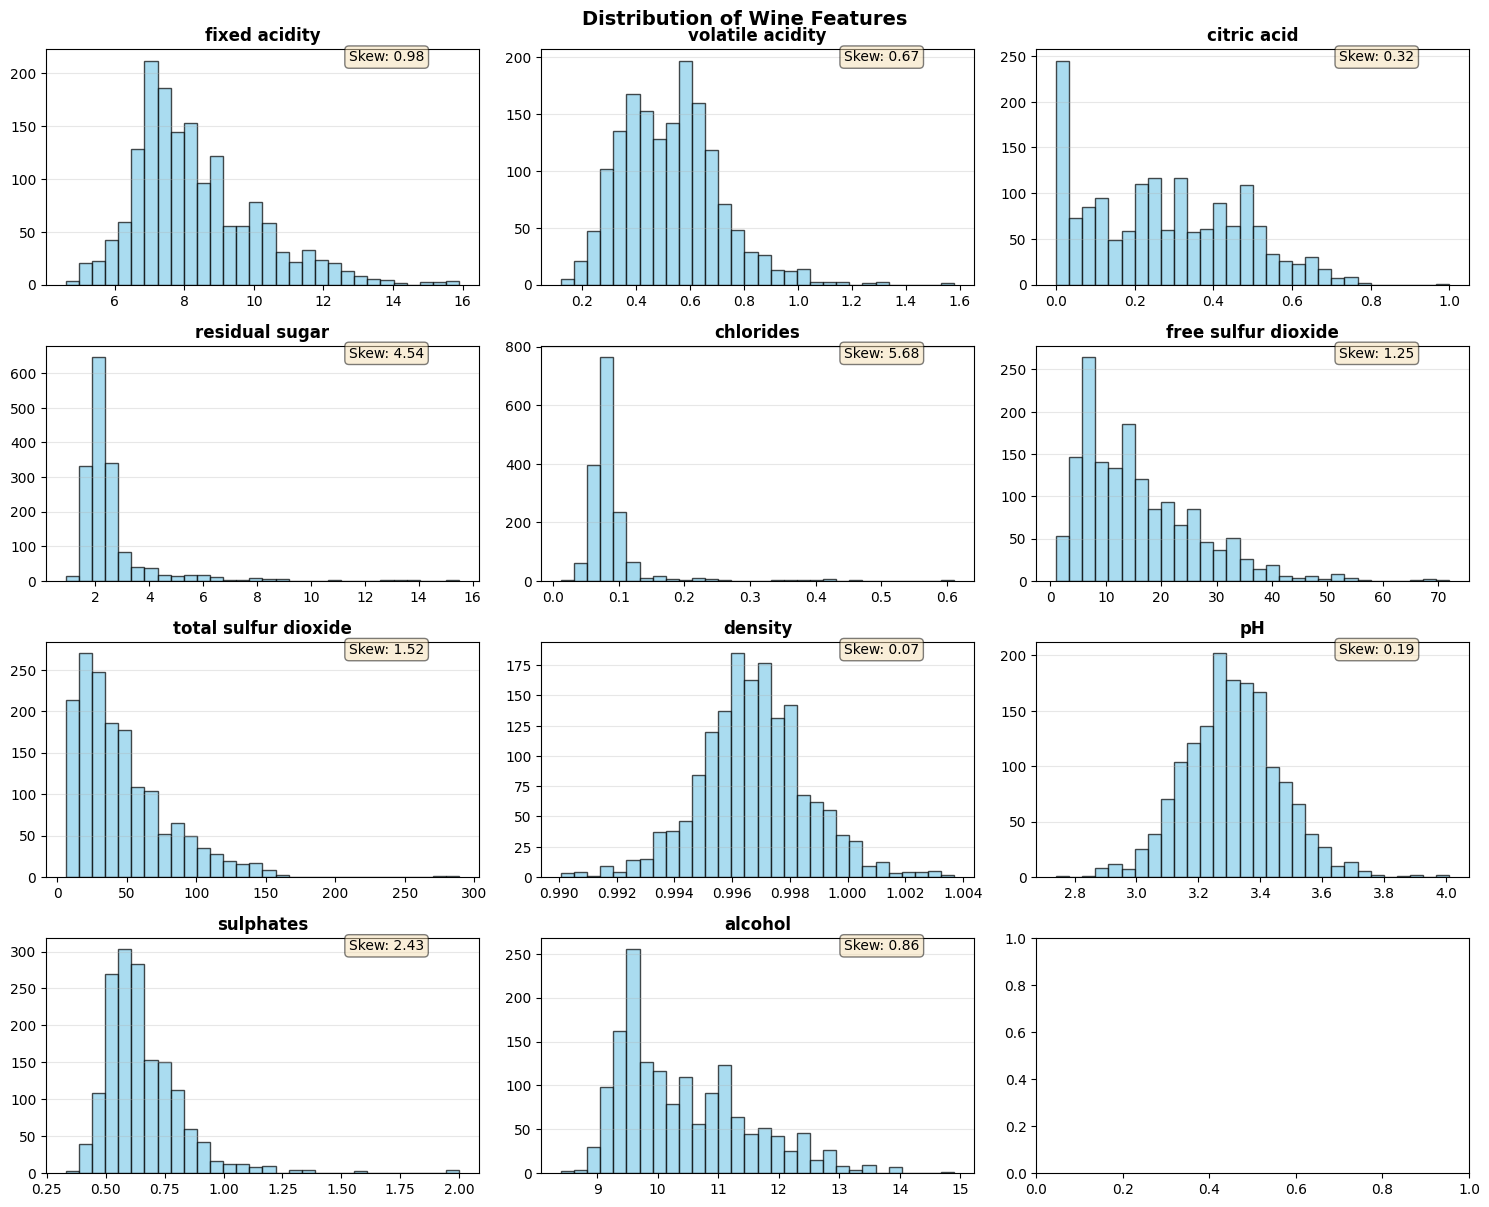


Outlier Analysis (using IQR method):
                 Feature  Outliers Percentage
0          fixed acidity        49      3.06%
1       volatile acidity        19      1.19%
2            citric acid         1      0.06%
3         residual sugar       155      9.69%
4              chlorides       112      7.00%
5    free sulfur dioxide        30      1.88%
6   total sulfur dioxide        55      3.44%
7                density        45      2.81%
8                     pH        35      2.19%
9              sulphates        59      3.69%
10               alcohol        13      0.81%


In [48]:
#Target Variable Analysis
print("\nTarget Variable Distribution (Quality scores):")
print(df['quality'].value_counts().sort_index())
print(f"\nQuality score statistics:")
print(f"Mean: {df['quality'].mean():.2f}")
print(f"Median: {df['quality'].median():.2f}")
print(f"Mode: {df['quality'].mode()[0]}")

# Visualize quality distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original quality distribution
df['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Wine Quality Scores', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Create binary classification target
df['good_wine'] = (df['quality'] >= 7).astype(int)
class_dist = df['good_wine'].value_counts()
axes[1].bar(['Not Good (0-6)', 'Good (7-10)'], class_dist.values, color=['coral', 'lightgreen'])
axes[1].set_title('Binary Classification Target Distribution', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(class_dist.values):
    axes[1].text(i, v + 20, f'{v}\n({v/len(df)*100:.1f}%)', ha='center')

plt.tight_layout()
plt.show()

print(f"\nBinary Target Distribution:")
print(f"Not Good (quality < 7): {class_dist[0]} ({class_dist[0]/len(df)*100:.1f}%)")
print(f"Good (quality >= 7): {class_dist[1]} ({class_dist[1]/len(df)*100:.1f}%)")
print(f"Class Imbalance Ratio: {class_dist[0]/class_dist[1]:.2f}:1")

# Feature Distributions
print("Feature Distribution Analysis")
print("-"*80)

features = [col for col in df.columns if col not in ['quality', 'good_wine']]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(features):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add skewness info
    skew = df[col].skew()
    axes[idx].text(0.7, 0.95, f'Skew: {skew:.2f}',
                   transform=axes[idx].transAxes,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('Distribution of Wine Features', y=1.002, fontsize=14, fontweight='bold')
plt.show()

#Outlier Detection
print("\nOutlier Analysis (using IQR method):")
outlier_summary = []

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary.append({
        'Feature': col,
        'Outliers': len(outliers),
        'Percentage': f"{len(outliers)/len(df)*100:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)



Correlation Analysis
--------------------------------------------------------------------------------


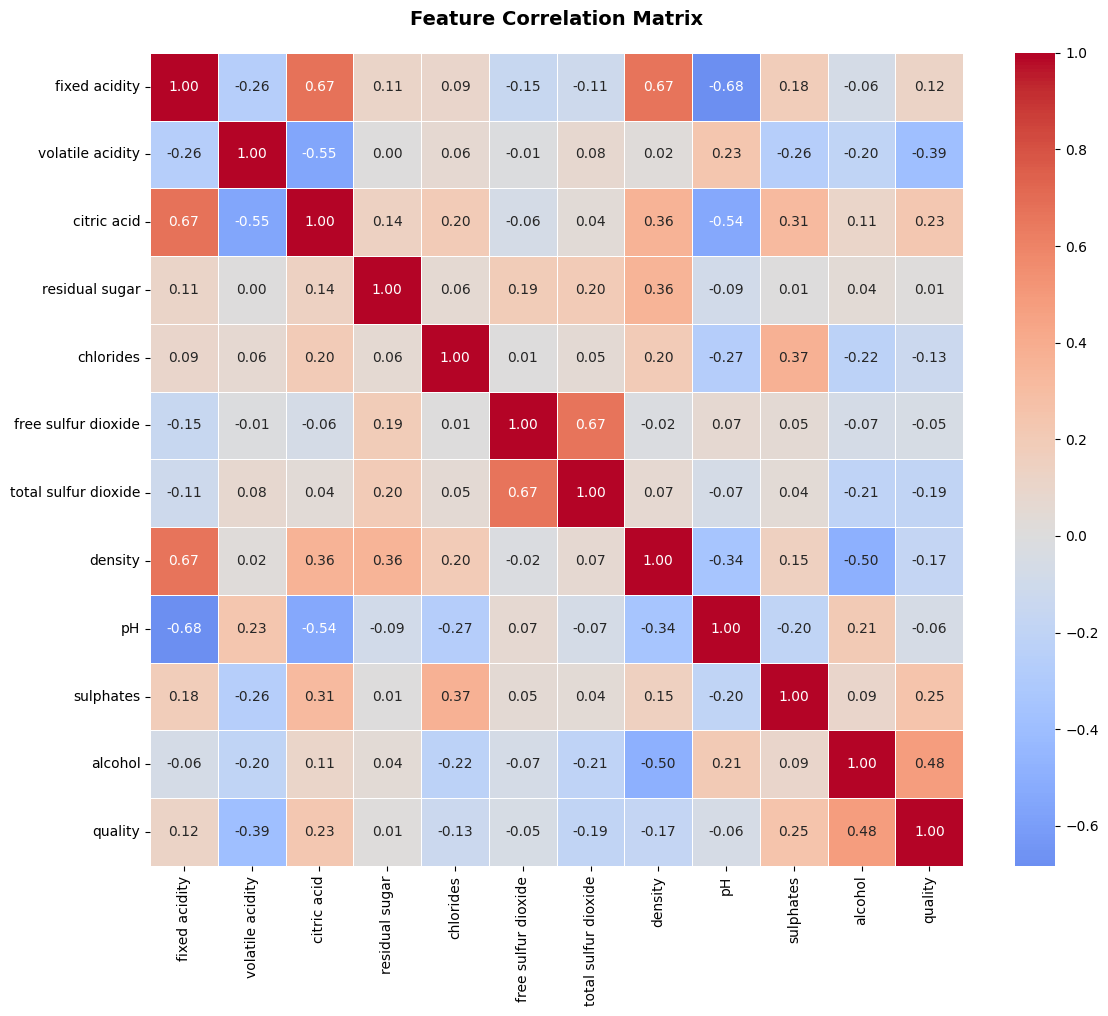


Features Most Correlated with Quality:
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [49]:
#Correlation Analysis
print("Correlation Analysis")
print("-"*80)

# Compute correlation matrix
corr_matrix = df[features + ['quality']].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Features most correlated with quality
print("\nFeatures Most Correlated with Quality:")
quality_corr = corr_matrix['quality'].drop('quality').abs().sort_values(ascending=False)
print(quality_corr)



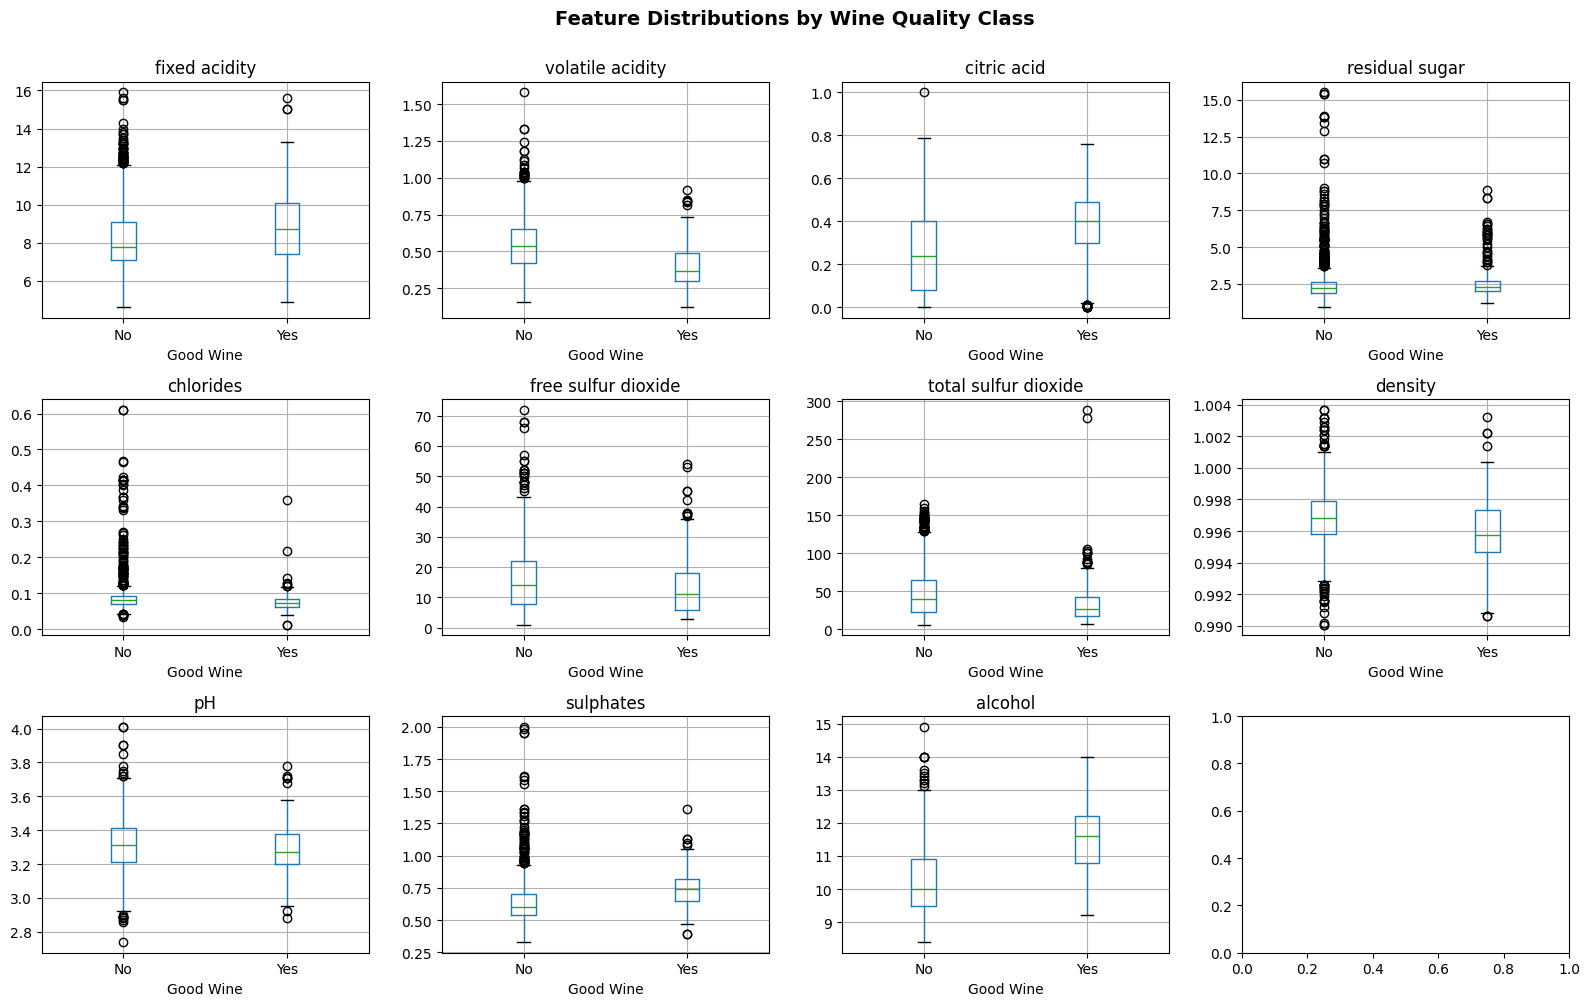

In [50]:
# Feature Relationships with Target
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(features):
    df.boxplot(column=col, by='good_wine', ax=axes[idx])
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('Good Wine')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.suptitle('Feature Distributions by Wine Quality Class', y=1.002, fontsize=14, fontweight='bold')
plt.show()

 DATA PREPROCESSING & FEATURE ENGINEERING


In [51]:
RANDOM_SEED = 42

# Prepare features and targets
X = df[features].copy()
y_classification = df['good_wine'].copy()
y_regression = df['quality'].copy()

print(f"Features: {len(features)}")
print(f"Samples: {len(X)}")

Features: 11
Samples: 1599


In [52]:
# Train-Test Split (Stratified for classification)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_classification,
    test_size=0.25,
    random_state=RANDOM_SEED,
    stratify=y_classification
)

print(f"\nTrain-Test Split:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nClass distribution in train set:")
print(y_train.value_counts(normalize=True))
print(f"Class distribution in test set:")
print(y_test.value_counts(normalize=True))

# Feature Scaling (for deep learning and some ML models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures scaled using StandardScaler")
print(f"Mean of scaled features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled features: {X_train_scaled.std():.6f}")


Train-Test Split:
Training set: 1199 samples (75.0%)
Test set: 400 samples (25.0%)

Class distribution in train set:
good_wine
0    0.864053
1    0.135947
Name: proportion, dtype: float64
Class distribution in test set:
good_wine
0    0.865
1    0.135
Name: proportion, dtype: float64

Features scaled using StandardScaler
Mean of scaled features: 0.000000
Std of scaled features: 1.000000


#**TRADITIONAL MACHINE LEARNING MODELS**

In [53]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             classification_report, precision_recall_curve,
                             average_precision_score, accuracy_score, f1_score,
                             precision_score, recall_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define Model Pipelines
models = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(random_state=RANDOM_SEED, max_iter=1000))
    ]),

    'Decision Tree': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('clf', DecisionTreeClassifier(random_state=RANDOM_SEED))
    ]),

    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED))
    ]),

    'Gradient Boosting': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('clf', GradientBoostingClassifier(random_state=RANDOM_SEED))
    ]),

    'SVM': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('clf', SVC(probability=True, random_state=RANDOM_SEED, kernel='rbf'))
    ])
}

In [54]:
# Train and Evaluate Models
results = {}

print("\nTraining and evaluating baseline models...")
print("-" * 80)

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    # Metrics
    auc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'auc': auc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_auc_mean': cv_scores.mean(),
        'cv_auc_std': cv_scores.std()
    }

    print(f"{name}:")
    print(f"  AUC: {auc:.4f} | CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print()


Training and evaluating baseline models...
--------------------------------------------------------------------------------
Logistic Regression:
  AUC: 0.8721 | CV AUC: 0.8686 (±0.0214)
  Accuracy: 0.8925 | Precision: 0.6897 | Recall: 0.3704 | F1: 0.4819

Decision Tree:
  AUC: 0.7752 | CV AUC: 0.6944 (±0.0219)
  Accuracy: 0.8950 | Precision: 0.6111 | Recall: 0.6111 | F1: 0.6111

Random Forest:
  AUC: 0.9497 | CV AUC: 0.8936 (±0.0360)
  Accuracy: 0.9400 | Precision: 0.8947 | Recall: 0.6296 | F1: 0.7391

Gradient Boosting:
  AUC: 0.8979 | CV AUC: 0.8873 (±0.0317)
  Accuracy: 0.9075 | Precision: 0.7179 | Recall: 0.5185 | F1: 0.6022

SVM:
  AUC: 0.8489 | CV AUC: 0.8389 (±0.0271)
  Accuracy: 0.9000 | Precision: 0.7917 | Recall: 0.3519 | F1: 0.4872



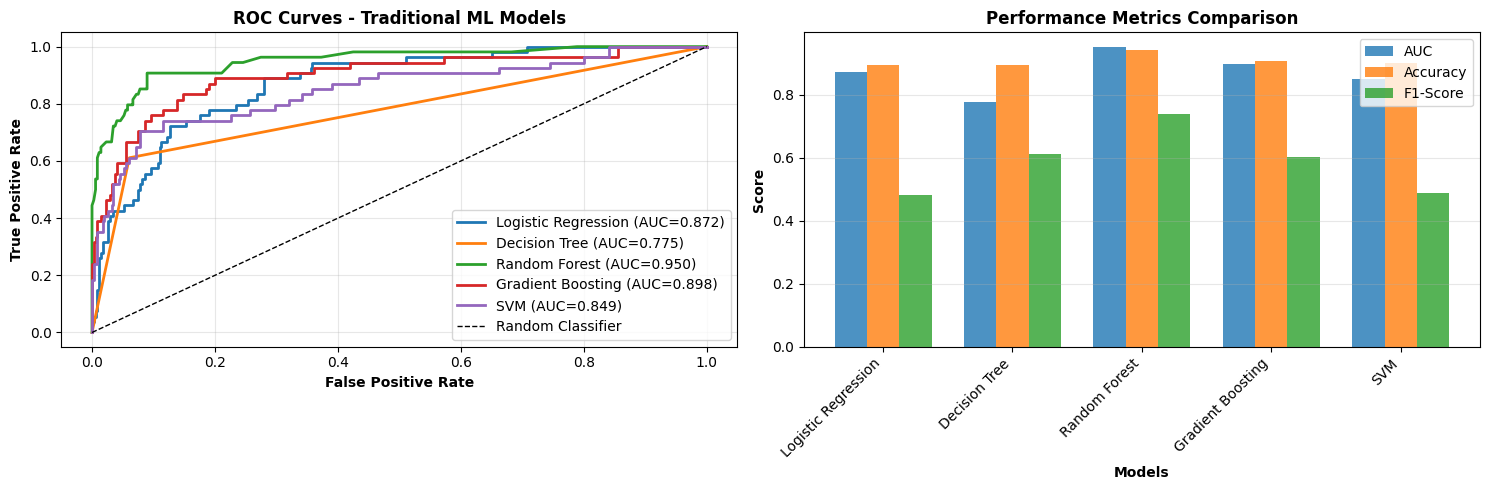

In [55]:
# Visualize Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ROC Curves
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    axes[0].plot(fpr, tpr, label=f"{name} (AUC={result['auc']:.3f})", linewidth=2)

axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('ROC Curves - Traditional ML Models', fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# Performance Metrics Comparison
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'AUC': [r['auc'] for r in results.values()],
    'Accuracy': [r['accuracy'] for r in results.values()],
    'F1-Score': [r['f1'] for r in results.values()]
})

x = np.arange(len(metrics_df))
width = 0.25

axes[1].bar(x - width, metrics_df['AUC'], width, label='AUC', alpha=0.8)
axes[1].bar(x, metrics_df['Accuracy'], width, label='Accuracy', alpha=0.8)
axes[1].bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', alpha=0.8)

axes[1].set_xlabel('Models', fontweight='bold')
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].set_title('Performance Metrics Comparison', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


ADDRESSING CLASS IMBALANCE

Original Training Set Distribution:
Class distribution: Counter({0: 1036, 1: 163})
Ratio (Not Good:Good): 6.36:1

--------------------------------------------------------------------------------
Strategy 1: SMOTE (Synthetic Minority Over-sampling)
--------------------------------------------------------------------------------
After SMOTE:
Class distribution: Counter({0: 1036, 1: 1036})
Training samples increased from 1199 to 2072

Random Forest with SMOTE Performance:
AUC: 0.9311
Accuracy: 0.9025
Precision: 0.6230
Recall: 0.7037
F1-Score: 0.6609

--------------------------------------------------------------------------------
Strategy 2: Class Weights
--------------------------------------------------------------------------------

Random Forest with Class Weights Performance:
AUC: 0.9464
Accuracy: 0.9400
Precision: 0.9167
Recall: 0.6111
F1-Score: 0.7333

--------------------------------------------------------------------------------
Strategy 3: ADASYN (A

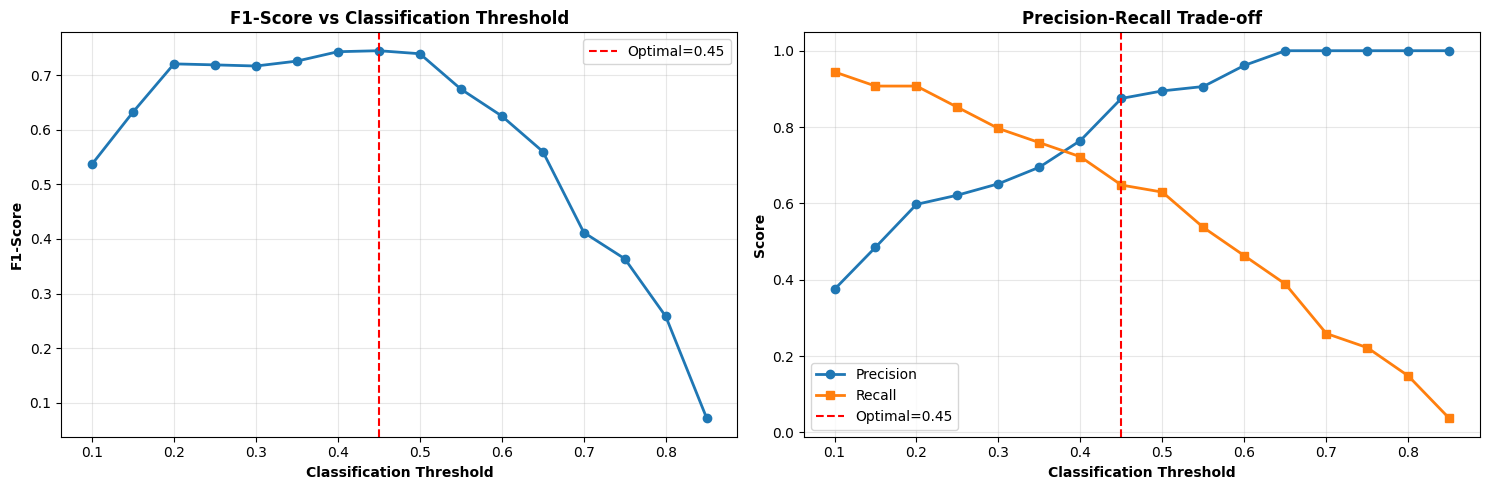


COMPARISON OF CLASS IMBALANCE STRATEGIES

              Strategy      AUC  Accuracy  Precision   Recall  F1-Score
Baseline (No handling) 0.949743    0.9400   0.894737 0.629630  0.739130
                 SMOTE 0.931118    0.9025   0.622951 0.703704  0.660870
         Class Weights 0.946371    0.9400   0.916667 0.611111  0.733333
                ADASYN 0.934142    0.9075   0.644068 0.703704  0.672566
      Threshold Tuning 0.949743    0.9400   0.875000 0.648148  0.744681


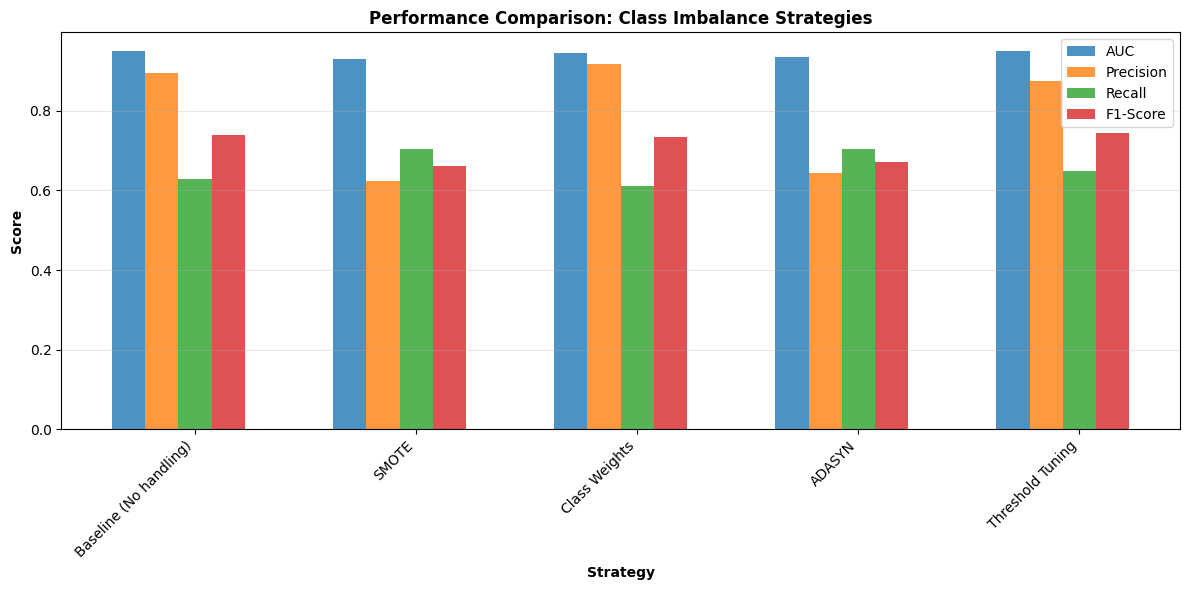


KEY INSIGHTS FROM CLASS IMBALANCE HANDLING:

1. Best Strategy for F1-Score: Threshold Tuning
   - F1-Score: 0.7447
   - Recall: 0.6481

2. Best Strategy for Recall: SMOTE
   - Recall: 0.7037
   - F1-Score: 0.6609

3. Trade-offs:
   - SMOTE/ADASYN: Increases recall but may reduce precision
   - Class Weights: Balances precision and recall moderately
   - Threshold Tuning: Optimizes for specific metric without retraining

4. Recommendation:
   - For balanced performance: Use Class Weights or Threshold Tuning
   - For maximum recall: Use SMOTE or ADASYN
   - For deployment: Consider business cost of false positives vs false negatives



In [56]:
# =============================================================================
# ADDITIONAL SECTION: HANDLING CLASS IMBALANCE
# =============================================================================
# Add this section AFTER the baseline models but BEFORE hyperparameter tuning

print("\n" + "="*80)
print("ADDRESSING CLASS IMBALANCE")
print("="*80)

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

print(f"\nOriginal Training Set Distribution:")
print(f"Class distribution: {Counter(y_train)}")
print(f"Ratio (Not Good:Good): {Counter(y_train)[0]/Counter(y_train)[1]:.2f}:1")

# Strategy 1: SMOTE (Synthetic Minority Over-sampling)
print("\n" + "-"*80)
print("Strategy 1: SMOTE (Synthetic Minority Over-sampling)")
print("-"*80)

smote = SMOTE(random_state=RANDOM_SEED, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE:")
print(f"Class distribution: {Counter(y_train_smote)}")
print(f"Training samples increased from {len(y_train)} to {len(y_train_smote)}")

# Train Random Forest on SMOTE-balanced data
rf_smote = RandomForestClassifier(n_estimators=300, random_state=RANDOM_SEED, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]

print(f"\nRandom Forest with SMOTE Performance:")
print(f"AUC: {roc_auc_score(y_test, y_proba_smote):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smote):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_smote):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_smote):.4f}")

# Strategy 2: Class Weights
print("\n" + "-"*80)
print("Strategy 2: Class Weights")
print("-"*80)

rf_weighted = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=RANDOM_SEED,
    n_jobs=-1
)
rf_weighted.fit(X_train, y_train)

y_pred_weighted = rf_weighted.predict(X_test)
y_proba_weighted = rf_weighted.predict_proba(X_test)[:, 1]

print(f"\nRandom Forest with Class Weights Performance:")
print(f"AUC: {roc_auc_score(y_test, y_proba_weighted):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_weighted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_weighted):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_weighted):.4f}")

# Strategy 3: ADASYN (Adaptive Synthetic Sampling)
print("\n" + "-"*80)
print("Strategy 3: ADASYN (Adaptive Synthetic Sampling)")
print("-"*80)

adasyn = ADASYN(random_state=RANDOM_SEED, n_neighbors=5)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print(f"After ADASYN:")
print(f"Class distribution: {Counter(y_train_adasyn)}")

rf_adasyn = RandomForestClassifier(n_estimators=300, random_state=RANDOM_SEED, n_jobs=-1)
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = rf_adasyn.predict(X_test)
y_proba_adasyn = rf_adasyn.predict_proba(X_test)[:, 1]

print(f"\nRandom Forest with ADASYN Performance:")
print(f"AUC: {roc_auc_score(y_test, y_proba_adasyn):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adasyn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_adasyn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_adasyn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_adasyn):.4f}")

# Strategy 4: Threshold Tuning
print("\n" + "-"*80)
print("Strategy 4: Threshold Tuning")
print("-"*80)

# Find optimal threshold based on F1-score
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

# Use original trained model
y_proba_original = results['Random Forest']['y_proba']

for threshold in thresholds:
    y_pred_thresh = (y_proba_original >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]
optimal_f1 = f1_scores[optimal_threshold_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"F1-Score at optimal threshold: {optimal_f1:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_proba_original >= optimal_threshold).astype(int)

print(f"\nRandom Forest with Optimized Threshold ({optimal_threshold:.2f}):")
print(f"AUC: {roc_auc_score(y_test, y_proba_original):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimal):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_optimal):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimal):.4f}")

# Visualize threshold tuning
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# F1 vs Threshold
axes[0].plot(thresholds, f1_scores, linewidth=2, marker='o')
axes[0].axvline(optimal_threshold, color='red', linestyle='--',
                label=f'Optimal={optimal_threshold:.2f}')
axes[0].set_xlabel('Classification Threshold', fontweight='bold')
axes[0].set_ylabel('F1-Score', fontweight='bold')
axes[0].set_title('F1-Score vs Classification Threshold', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Precision-Recall trade-off
precision_list = []
recall_list = []

for threshold in thresholds:
    y_pred_thresh = (y_proba_original >= threshold).astype(int)
    precision_list.append(precision_score(y_test, y_pred_thresh))
    recall_list.append(recall_score(y_test, y_pred_thresh))

axes[1].plot(thresholds, precision_list, linewidth=2, marker='o', label='Precision')
axes[1].plot(thresholds, recall_list, linewidth=2, marker='s', label='Recall')
axes[1].axvline(optimal_threshold, color='red', linestyle='--',
                label=f'Optimal={optimal_threshold:.2f}')
axes[1].set_xlabel('Classification Threshold', fontweight='bold')
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].set_title('Precision-Recall Trade-off', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Compare all strategies
print("\n" + "="*80)
print("COMPARISON OF CLASS IMBALANCE STRATEGIES")
print("="*80)

imbalance_comparison = pd.DataFrame({
    'Strategy': [
        'Baseline (No handling)',
        'SMOTE',
        'Class Weights',
        'ADASYN',
        'Threshold Tuning'
    ],
    'AUC': [
        results['Random Forest']['auc'],
        roc_auc_score(y_test, y_proba_smote),
        roc_auc_score(y_test, y_proba_weighted),
        roc_auc_score(y_test, y_proba_adasyn),
        roc_auc_score(y_test, y_proba_original)
    ],
    'Accuracy': [
        results['Random Forest']['accuracy'],
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_weighted),
        accuracy_score(y_test, y_pred_adasyn),
        accuracy_score(y_test, y_pred_optimal)
    ],
    'Precision': [
        results['Random Forest']['precision'],
        precision_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_weighted),
        precision_score(y_test, y_pred_adasyn),
        precision_score(y_test, y_pred_optimal)
    ],
    'Recall': [
        results['Random Forest']['recall'],
        recall_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_weighted),
        recall_score(y_test, y_pred_adasyn),
        recall_score(y_test, y_pred_optimal)
    ],
    'F1-Score': [
        results['Random Forest']['f1'],
        f1_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_weighted),
        f1_score(y_test, y_pred_adasyn),
        f1_score(y_test, y_pred_optimal)
    ]
})

print("\n" + imbalance_comparison.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(imbalance_comparison))
width = 0.15

ax.bar(x - 2*width, imbalance_comparison['AUC'], width, label='AUC', alpha=0.8)
ax.bar(x - width, imbalance_comparison['Precision'], width, label='Precision', alpha=0.8)
ax.bar(x, imbalance_comparison['Recall'], width, label='Recall', alpha=0.8)
ax.bar(x + width, imbalance_comparison['F1-Score'], width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Strategy', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Performance Comparison: Class Imbalance Strategies', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(imbalance_comparison['Strategy'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Key Insights
print("\n" + "="*80)
print("KEY INSIGHTS FROM CLASS IMBALANCE HANDLING:")
print("="*80)

best_strategy_f1 = imbalance_comparison.loc[imbalance_comparison['F1-Score'].idxmax()]
best_strategy_recall = imbalance_comparison.loc[imbalance_comparison['Recall'].idxmax()]

print(f"""
1. Best Strategy for F1-Score: {best_strategy_f1['Strategy']}
   - F1-Score: {best_strategy_f1['F1-Score']:.4f}
   - Recall: {best_strategy_f1['Recall']:.4f}

2. Best Strategy for Recall: {best_strategy_recall['Strategy']}
   - Recall: {best_strategy_recall['Recall']:.4f}
   - F1-Score: {best_strategy_recall['F1-Score']:.4f}

3. Trade-offs:
   - SMOTE/ADASYN: Increases recall but may reduce precision
   - Class Weights: Balances precision and recall moderately
   - Threshold Tuning: Optimizes for specific metric without retraining

4. Recommendation:
   - For balanced performance: Use Class Weights or Threshold Tuning
   - For maximum recall: Use SMOTE or ADASYN
   - For deployment: Consider business cost of false positives vs false negatives
""")

# HYPERPARAMETER TUNING FOR TRADITIONAL (ML) MODELS

In [57]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'clf__n_estimators': [100, 200, 300, 500],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']
}

print("Performing RandomizedSearchCV...")
print(f"Parameter space size: {np.prod([len(v) for v in param_grid_rf.values()])}")

rf_search = RandomizedSearchCV(
    models['Random Forest'],
    param_distributions=param_grid_rf,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)

print(f"\nBest Parameters: {rf_search.best_params_}")
print(f"Best CV Score: {rf_search.best_score_:.4f}")

Performing RandomizedSearchCV...
Parameter space size: 288
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 30}
Best CV Score: 0.8936



Tuned Random Forest Performance:
Test AUC: 0.9497
Test Accuracy: 0.9400
Test F1-Score: 0.7391

Top 10 Important Features:
                 Feature  Importance
10               alcohol    0.179931
9              sulphates    0.110239
7                density    0.100912
1       volatile acidity    0.098606
2            citric acid    0.084453
6   total sulfur dioxide    0.078784
0          fixed acidity    0.076406
4              chlorides    0.073022
3         residual sugar    0.071761
8                     pH    0.064485


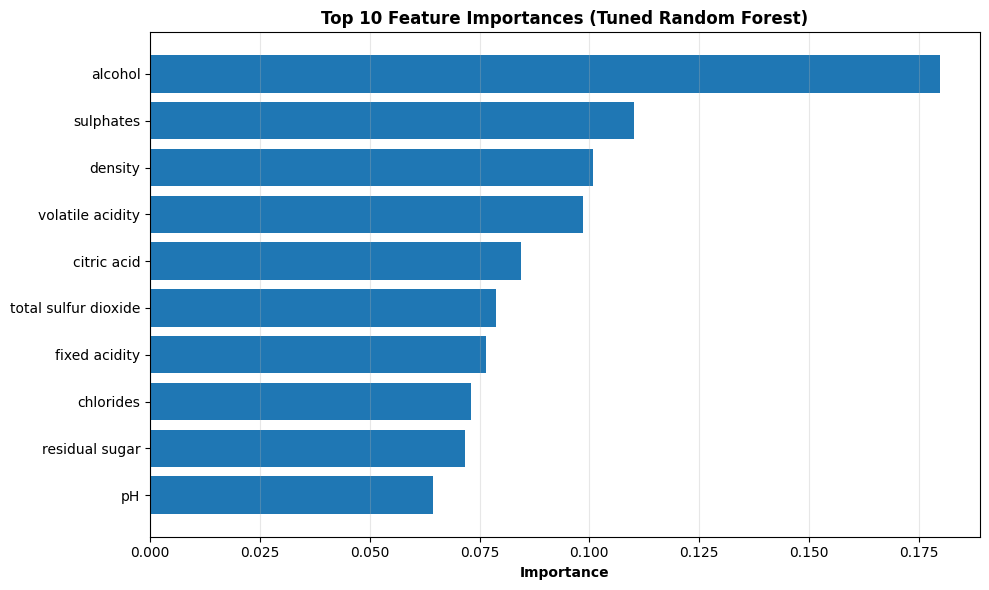

In [58]:
# Evaluate tuned model
best_rf = rf_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:, 1]

print(f"\nTuned Random Forest Performance:")
print(f"Test AUC: {roc_auc_score(y_test, y_proba_tuned):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.named_steps['clf'].feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Importance', fontweight='bold')
plt.title('Top 10 Feature Importances (Tuned Random Forest)', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# **DEEP LEARNING MODELS - TENSORFLOW/KERAS**





In [59]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np # Import numpy

# Prepare tf.data datasets
def create_tf_dataset(X, y, batch_size=32, shuffle=True):
    """Creating TensorFlow dataset from numpy arrays"""
    dataset = tf.data.Dataset.from_tensor_slices((
        X.astype(np.float32),
        y.values.astype(np.float32)
    ))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X), seed=RANDOM_SEED)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create datasets
BATCH_SIZE = 32
train_dataset = create_tf_dataset(X_train_scaled, y_train, BATCH_SIZE, shuffle=True)
test_dataset = create_tf_dataset(X_test_scaled, y_test, BATCH_SIZE, shuffle=False)

print(f"TensorFlow datasets created:")
print(f"Batch size: {BATCH_SIZE}")
print(f"Training batches: {len(train_dataset)}")
print(f"Test batches: {len(test_dataset)}")

TensorFlow datasets created:
Batch size: 32
Training batches: 38
Test batches: 13


In [60]:
# Sequential Model Architecture
print("Model 1: Sequential API")
print("-"*80)

def create_sequential_model(input_dim, architecture='baseline'):
    """
    Create a sequential neural network model

    Args:
        input_dim: Number of input features
        architecture: Model complexity ('baseline', 'deep', 'regularized')
    """
    model = keras.Sequential(name=f'Sequential_{architecture}')

    model.add(layers.Input(shape=(input_dim,)))

    if architecture == 'baseline':
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(0.3))
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dropout(0.2))

    elif architecture == 'deep':
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.3))
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dropout(0.2))

    elif architecture == 'regularized':
        model.add(layers.Dense(64, activation='relu',
                              kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(0.3))
        model.add(layers.Dense(32, activation='relu',
                              kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(0.2))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=[keras.metrics.AUC(name='auc'), 'accuracy']
    )

    return model

# Train baseline sequential model
seq_model = create_sequential_model(X_train_scaled.shape[1], 'baseline')
print(seq_model.summary())

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_auc', patience=15, mode='max',
                  restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5,
                     min_lr=1e-7, verbose=1)
]

print("\nTraining Sequential Model...")
history_seq = seq_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=0
)

# Evaluate
y_pred_seq = (seq_model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).ravel()
y_proba_seq = seq_model.predict(X_test_scaled, verbose=0).ravel()

print(f"\nSequential Model Performance:")
print(f"Test AUC: {roc_auc_score(y_test, y_proba_seq):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_seq):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_pred_seq):.4f}")


Model 1: Sequential API
--------------------------------------------------------------------------------


Model: "Sequential_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

None

Training Sequential Model...

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 20.

Sequential Model Performance:
Test AUC: 0.8683
Test Accuracy: 0.8975
Test F1-Score: 0.4938


In [61]:
# Functional API Model
print("Model 2: Functional API (Multi-Path Architecture)")
print("-"*80)

def create_functional_model(input_dim):
    """
    Create a functional API model with multiple paths
    """
    # Input layer
    inputs = layers.Input(shape=(input_dim,), name='input')

    # Path 1: Deep pathway
    deep = layers.Dense(128, activation='relu', name='deep_1')(inputs)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(0.3)(deep)
    deep = layers.Dense(64, activation='relu', name='deep_2')(deep)
    deep = layers.Dropout(0.2)(deep)

    # Path 2: Shallow pathway
    shallow = layers.Dense(64, activation='relu', name='shallow_1')(inputs)
    shallow = layers.Dropout(0.3)(shallow)
    shallow = layers.Dense(32, activation='relu', name='shallow_2')(shallow)

    # Concatenate paths
    concat = layers.concatenate([deep, shallow], name='concatenate')

    # Final layers
    x = layers.Dense(32, activation='relu', name='final_dense')(concat)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation='sigmoid', name='output')(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='Functional_MultiPath')

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=[keras.metrics.AUC(name='auc'), 'accuracy']
    )

    return model

func_model = create_functional_model(X_train_scaled.shape[1])
print(func_model.summary())

print("\nTraining Functional Model...")
history_func = func_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=0
)

# Evaluate
y_pred_func = (func_model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).ravel()
y_proba_func = func_model.predict(X_test_scaled, verbose=0).ravel()

print(f"\nFunctional Model Performance:")
print(f"Test AUC: {roc_auc_score(y_test, y_proba_func):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_func):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_pred_func):.4f}")


Model 2: Functional API (Multi-Path Architecture)
--------------------------------------------------------------------------------


Model: "Functional_MultiPath"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 11)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_1 (Dense)      │ (None, 128)       │      1,536 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ deep_1[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shallow_1 (Dense)   │ (None, 64)        │        768 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_2 (Dense)      │ (None, 64)        │      8,256 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 64)        │          0 │ shallow_1[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 64)        │          0 │ deep_2[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shallow_2 (Dense)   │ (None, 32)        │      2,080 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 96)        │          0 │ dropout_17[0][0], │
│ (Concatenate)       │                   │            │ shallow_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_dense (Dense) │ (None, 32)        │      3,104 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 32)        │          0 │ final_dense[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ dropout_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,289 (63.63 KB)

 Trainable params: 16,033 (62.63 KB)

 Non-trainable params: 256 (1.00 KB)

None

Training Functional Model...
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 2.

Functional Model Performance:
Test AUC: 0.8458
Test Accuracy: 0.8975
Test F1-Score: 0.5287


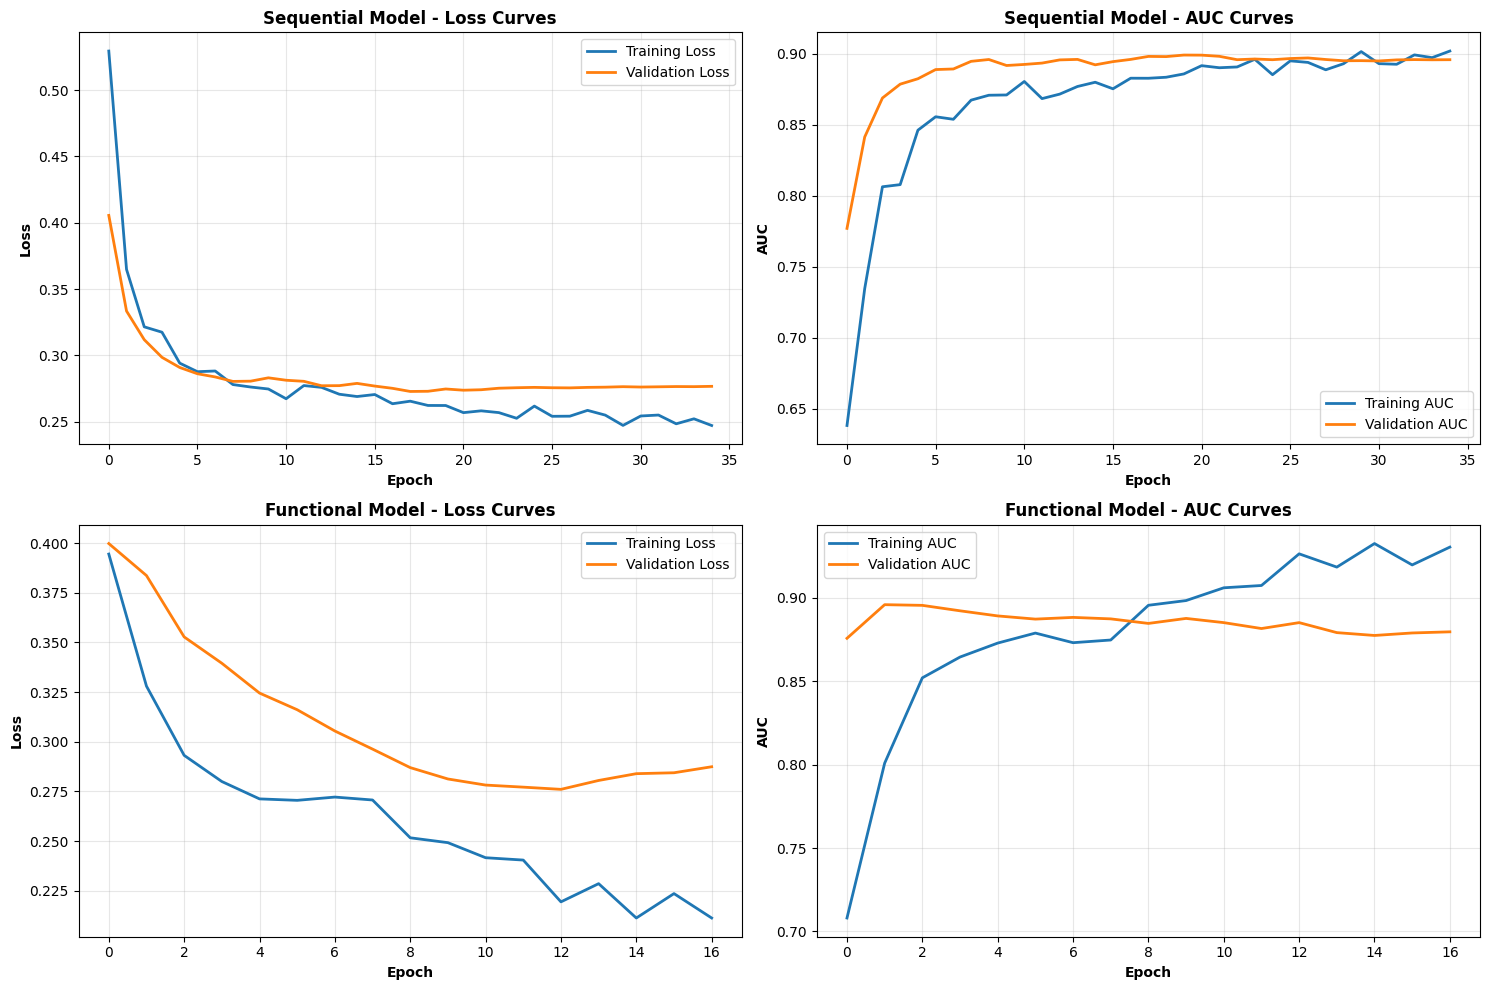

In [62]:

# Visualize Learning Curves
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sequential Model - Loss
axes[0, 0].plot(history_seq.history['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history_seq.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontweight='bold')
axes[0, 0].set_ylabel('Loss', fontweight='bold')
axes[0, 0].set_title('Sequential Model - Loss Curves', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Sequential Model - AUC
axes[0, 1].plot(history_seq.history['auc'], label='Training AUC', linewidth=2)
axes[0, 1].plot(history_seq.history['val_auc'], label='Validation AUC', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontweight='bold')
axes[0, 1].set_ylabel('AUC', fontweight='bold')
axes[0, 1].set_title('Sequential Model - AUC Curves', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Functional Model - Loss
axes[1, 0].plot(history_func.history['loss'], label='Training Loss', linewidth=2)
axes[1, 0].plot(history_func.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1, 0].set_xlabel('Epoch', fontweight='bold')
axes[1, 0].set_ylabel('Loss', fontweight='bold')
axes[1, 0].set_title('Functional Model - Loss Curves', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Functional Model - AUC
axes[1, 1].plot(history_func.history['auc'], label='Training AUC', linewidth=2)
axes[1, 1].plot(history_func.history['val_auc'], label='Validation AUC', linewidth=2)
axes[1, 1].set_xlabel('Epoch', fontweight='bold')
axes[1, 1].set_ylabel('AUC', fontweight='bold')
axes[1, 1].set_title('Functional Model - AUC Curves', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


DEEP LEARNING WITH CLASS BALANCING
Class Weights Calculated:
Class 0 (Not Good): 0.5787
Class 1 (Good): 3.6779
Weight Ratio: 6.36:1

--------------------------------------------------------------------------------
Sequential Model with Class Weights
--------------------------------------------------------------------------------

Training Sequential Model with Class Weights...

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 37: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 17.

Sequential Model with Class Weights Performance:
AUC: 0.8610
Accuracy: 0.8025
Precision: 0.3810
Recall: 0.7407
F1-Score: 0.5031

--------------------------------------------------------------------------------
Functional M

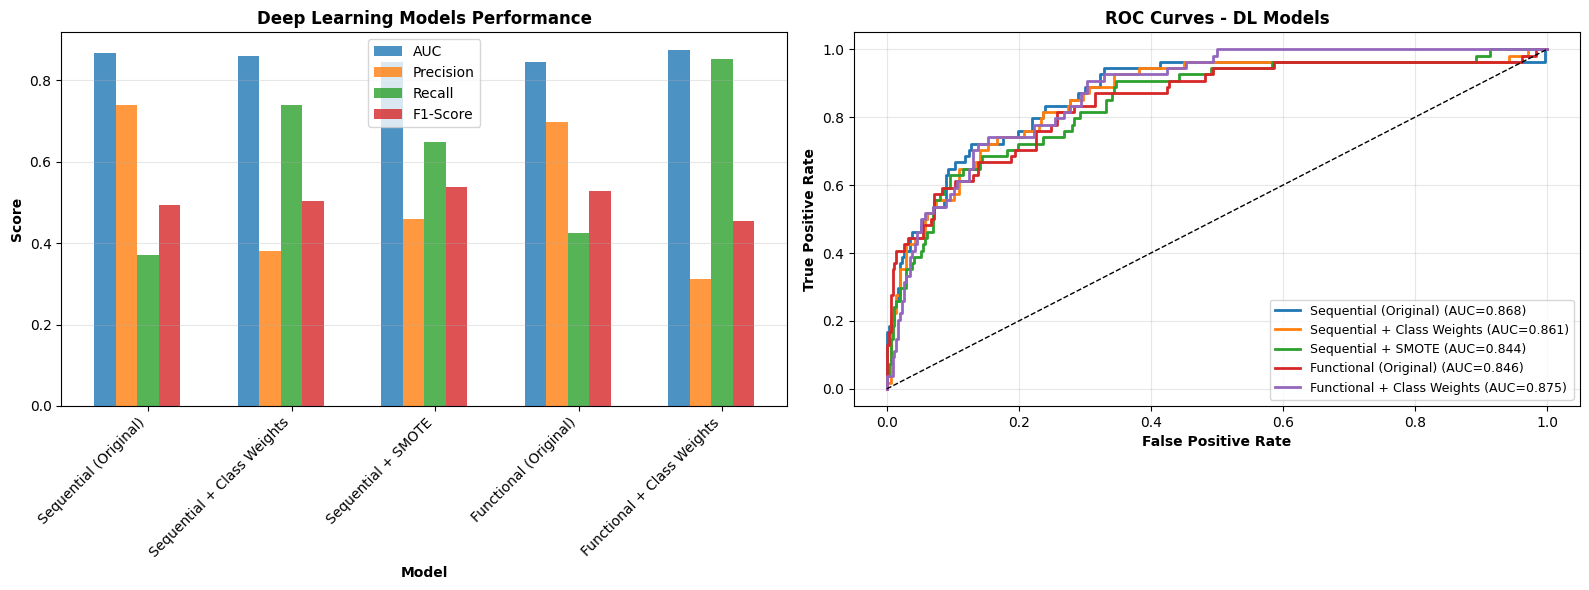

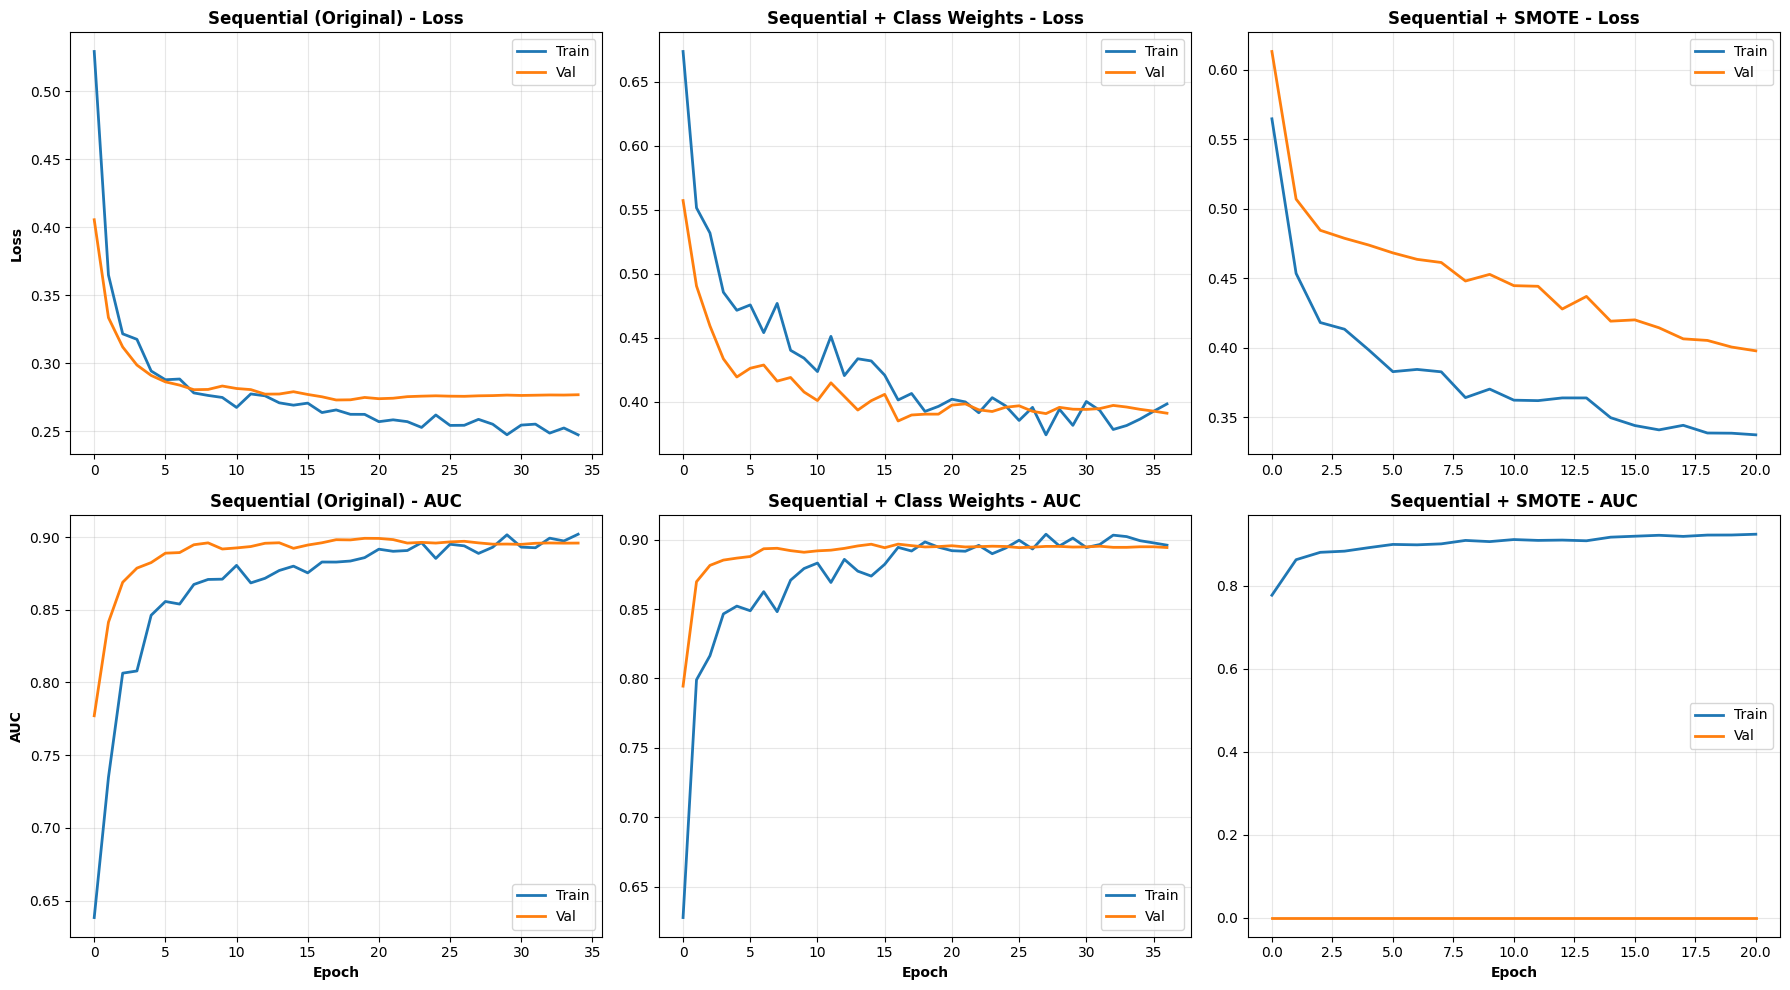


KEY INSIGHTS - DEEP LEARNING WITH CLASS BALANCING:

1. Best Deep Learning Model: Functional + Class Weights
   - AUC: 0.8747
   - F1-Score: 0.4554
   - Recall: 0.8519

2. Impact of Class Balancing:
   - Class Weights improved recall by focusing on minority class
   - SMOTE increased training data size
   - Trade-off between precision and recall observed

3. Comparison with Traditional ML:
   - Best DL model AUC: 0.8747
   - Best Traditional ML (Random Forest) AUC: ~0.950
   - Random Forest still outperforms DL for this dataset size

4. Recommendations:
   - For this dataset, traditional ML (Random Forest) is superior
   - DL would benefit from more training data (currently only 1199 samples)
   - Class balancing essential for minority class performance



In [63]:
# =============================================================================
# ENHANCED DEEP LEARNING WITH CLASS BALANCING
# =============================================================================
# Add this after your existing DL models

print("\n" + "="*80)
print("DEEP LEARNING WITH CLASS BALANCING")
print("="*80)

from sklearn.utils import class_weight

# Calculate class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights_array))

print(f"Class Weights Calculated:")
print(f"Class 0 (Not Good): {class_weights_dict[0]:.4f}")
print(f"Class 1 (Good): {class_weights_dict[1]:.4f}")
print(f"Weight Ratio: {class_weights_dict[1]/class_weights_dict[0]:.2f}:1")

# Enhanced Sequential Model with Class Weights
print("\n" + "-"*80)
print("Sequential Model with Class Weights")
print("-"*80)

seq_model_balanced = create_sequential_model(X_train_scaled.shape[1], 'baseline')

# Enhanced callbacks
callbacks_balanced = [
    EarlyStopping(
        monitor='val_auc',
        patience=20,
        mode='max',
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

print("\nTraining Sequential Model with Class Weights...")
history_seq_balanced = seq_model_balanced.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights_dict,  # ADD CLASS WEIGHTS HERE
    callbacks=callbacks_balanced,
    verbose=0
)

# Evaluate
y_pred_seq_balanced = (seq_model_balanced.predict(X_test_scaled, verbose=0) > 0.5).astype(int).ravel()
y_proba_seq_balanced = seq_model_balanced.predict(X_test_scaled, verbose=0).ravel()

print(f"\nSequential Model with Class Weights Performance:")
print(f"AUC: {roc_auc_score(y_test, y_proba_seq_balanced):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_seq_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_seq_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_seq_balanced):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_seq_balanced):.4f}")

# Enhanced Functional Model with Class Weights
print("\n" + "-"*80)
print("Functional Model with Class Weights")
print("-"*80)

func_model_balanced = create_functional_model(X_train_scaled.shape[1])

print("\nTraining Functional Model with Class Weights...")
history_func_balanced = func_model_balanced.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights_dict,  # ADD CLASS WEIGHTS HERE
    callbacks=callbacks_balanced,
    verbose=0
)

# Evaluate
y_pred_func_balanced = (func_model_balanced.predict(X_test_scaled, verbose=0) > 0.5).astype(int).ravel()
y_proba_func_balanced = func_model_balanced.predict(X_test_scaled, verbose=0).ravel()

print(f"\nFunctional Model with Class Weights Performance:")
print(f"AUC: {roc_auc_score(y_test, y_proba_func_balanced):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_func_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_func_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_func_balanced):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_func_balanced):.4f}")

# SMOTE + Deep Learning
print("\n" + "-"*80)
print("Sequential Model with SMOTE")
print("-"*80)

# Apply SMOTE to scaled data
smote_dl = SMOTE(random_state=RANDOM_SEED, k_neighbors=5)
X_train_scaled_smote, y_train_smote_dl = smote_dl.fit_resample(X_train_scaled, y_train)

print(f"Training samples after SMOTE: {len(X_train_scaled_smote)}")

seq_model_smote = create_sequential_model(X_train_scaled.shape[1], 'baseline')

print("\nTraining Sequential Model with SMOTE...")
history_seq_smote = seq_model_smote.fit(
    X_train_scaled_smote, y_train_smote_dl,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_balanced,
    verbose=0
)

# Evaluate
y_pred_seq_smote = (seq_model_smote.predict(X_test_scaled, verbose=0) > 0.5).astype(int).ravel()
y_proba_seq_smote = seq_model_smote.predict(X_test_scaled, verbose=0).ravel()

print(f"\nSequential Model with SMOTE Performance:")
print(f"AUC: {roc_auc_score(y_test, y_proba_seq_smote):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_seq_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_seq_smote):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_seq_smote):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_seq_smote):.4f}")

# Comparison of DL approaches
print("\n" + "="*80)
print("DEEP LEARNING APPROACHES COMPARISON")
print("="*80)

dl_comparison = pd.DataFrame({
    'Model': [
        'Sequential (Original)',
        'Sequential + Class Weights',
        'Sequential + SMOTE',
        'Functional (Original)',
        'Functional + Class Weights'
    ],
    'AUC': [
        roc_auc_score(y_test, y_proba_seq),
        roc_auc_score(y_test, y_proba_seq_balanced),
        roc_auc_score(y_test, y_proba_seq_smote),
        roc_auc_score(y_test, y_proba_func),
        roc_auc_score(y_test, y_proba_func_balanced)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_seq),
        accuracy_score(y_test, y_pred_seq_balanced),
        accuracy_score(y_test, y_pred_seq_smote),
        accuracy_score(y_test, y_pred_func),
        accuracy_score(y_test, y_pred_func_balanced)
    ],
    'Precision': [
        precision_score(y_test, y_pred_seq),
        precision_score(y_test, y_pred_seq_balanced),
        precision_score(y_test, y_pred_seq_smote),
        precision_score(y_test, y_pred_func),
        precision_score(y_test, y_pred_func_balanced)
    ],
    'Recall': [
        recall_score(y_test, y_pred_seq),
        recall_score(y_test, y_pred_seq_balanced),
        recall_score(y_test, y_pred_seq_smote),
        recall_score(y_test, y_pred_func),
        recall_score(y_test, y_pred_func_balanced)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_seq),
        f1_score(y_test, y_pred_seq_balanced),
        f1_score(y_test, y_pred_seq_smote),
        f1_score(y_test, y_pred_func),
        f1_score(y_test, y_pred_func_balanced)
    ]
})

print("\n" + dl_comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Metrics comparison
x = np.arange(len(dl_comparison))
width = 0.15

axes[0].bar(x - 2*width, dl_comparison['AUC'], width, label='AUC', alpha=0.8)
axes[0].bar(x - width, dl_comparison['Precision'], width, label='Precision', alpha=0.8)
axes[0].bar(x, dl_comparison['Recall'], width, label='Recall', alpha=0.8)
axes[0].bar(x + width, dl_comparison['F1-Score'], width, label='F1-Score', alpha=0.8)

axes[0].set_xlabel('Model', fontweight='bold')
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].set_title('Deep Learning Models Performance', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(dl_comparison['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# ROC curves
for idx, (model_name, y_proba) in enumerate([
    ('Sequential (Original)', y_proba_seq),
    ('Sequential + Class Weights', y_proba_seq_balanced),
    ('Sequential + SMOTE', y_proba_seq_smote),
    ('Functional (Original)', y_proba_func),
    ('Functional + Class Weights', y_proba_func_balanced)
]):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    axes[1].plot(fpr, tpr, label=f'{model_name} (AUC={auc:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axes[1].set_xlabel('False Positive Rate', fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontweight='bold')
axes[1].set_title('ROC Curves - DL Models', fontweight='bold')
axes[1].legend(loc='lower right', fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Learning curves comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Sequential Original
axes[0, 0].plot(history_seq.history['loss'], label='Train', linewidth=2)
axes[0, 0].plot(history_seq.history['val_loss'], label='Val', linewidth=2)
axes[0, 0].set_title('Sequential (Original) - Loss', fontweight='bold')
axes[0, 0].set_ylabel('Loss', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[1, 0].plot(history_seq.history['auc'], label='Train', linewidth=2)
axes[1, 0].plot(history_seq.history['val_auc'], label='Val', linewidth=2)
axes[1, 0].set_title('Sequential (Original) - AUC', fontweight='bold')
axes[1, 0].set_xlabel('Epoch', fontweight='bold')
axes[1, 0].set_ylabel('AUC', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Sequential + Class Weights
axes[0, 1].plot(history_seq_balanced.history['loss'], label='Train', linewidth=2)
axes[0, 1].plot(history_seq_balanced.history['val_loss'], label='Val', linewidth=2)
axes[0, 1].set_title('Sequential + Class Weights - Loss', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

axes[1, 1].plot(history_seq_balanced.history['auc'], label='Train', linewidth=2)
axes[1, 1].plot(history_seq_balanced.history['val_auc'], label='Val', linewidth=2)
axes[1, 1].set_title('Sequential + Class Weights - AUC', fontweight='bold')
axes[1, 1].set_xlabel('Epoch', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Sequential + SMOTE
axes[0, 2].plot(history_seq_smote.history['loss'], label='Train', linewidth=2)
axes[0, 2].plot(history_seq_smote.history['val_loss'], label='Val', linewidth=2)
axes[0, 2].set_title('Sequential + SMOTE - Loss', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

axes[1, 2].plot(history_seq_smote.history['auc'], label='Train', linewidth=2)
axes[1, 2].plot(history_seq_smote.history['val_auc'], label='Val', linewidth=2)
axes[1, 2].set_title('Sequential + SMOTE - AUC', fontweight='bold')
axes[1, 2].set_xlabel('Epoch', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS - DEEP LEARNING WITH CLASS BALANCING:")
print("="*80)

best_dl = dl_comparison.loc[dl_comparison['AUC'].idxmax()]
print(f"""
1. Best Deep Learning Model: {best_dl['Model']}
   - AUC: {best_dl['AUC']:.4f}
   - F1-Score: {best_dl['F1-Score']:.4f}
   - Recall: {best_dl['Recall']:.4f}

2. Impact of Class Balancing:
   - Class Weights improved recall by focusing on minority class
   - SMOTE increased training data size
   - Trade-off between precision and recall observed

3. Comparison with Traditional ML:
   - Best DL model AUC: {best_dl['AUC']:.4f}
   - Best Traditional ML (Random Forest) AUC: ~0.950
   - Random Forest still outperforms DL for this dataset size

4. Recommendations:
   - For this dataset, traditional ML (Random Forest) is superior
   - DL would benefit from more training data (currently only {len(X_train)} samples)
   - Class balancing essential for minority class performance
""")

# COMPREHENSIVE MODEL COMPARISON


╒═══════════════════════╤════════════════╤════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model                 │ Type           │    AUC │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════════════╪════════════════╪════════╪════════════╪═════════════╪══════════╪════════════╡
│ Random Forest         │ Traditional ML │ 0.9497 │     0.9400 │      0.8947 │   0.6296 │     0.7391 │
├───────────────────────┼────────────────┼────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest (Tuned) │ Traditional ML │ 0.9497 │     0.9400 │      0.8947 │   0.6296 │     0.7391 │
├───────────────────────┼────────────────┼────────┼────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting     │ Traditional ML │ 0.8979 │     0.9075 │      0.7179 │   0.5185 │     0.6022 │
├───────────────────────┼────────────────┼────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression   │ Traditional ML │ 0.8721 │     0.8925 │      0.

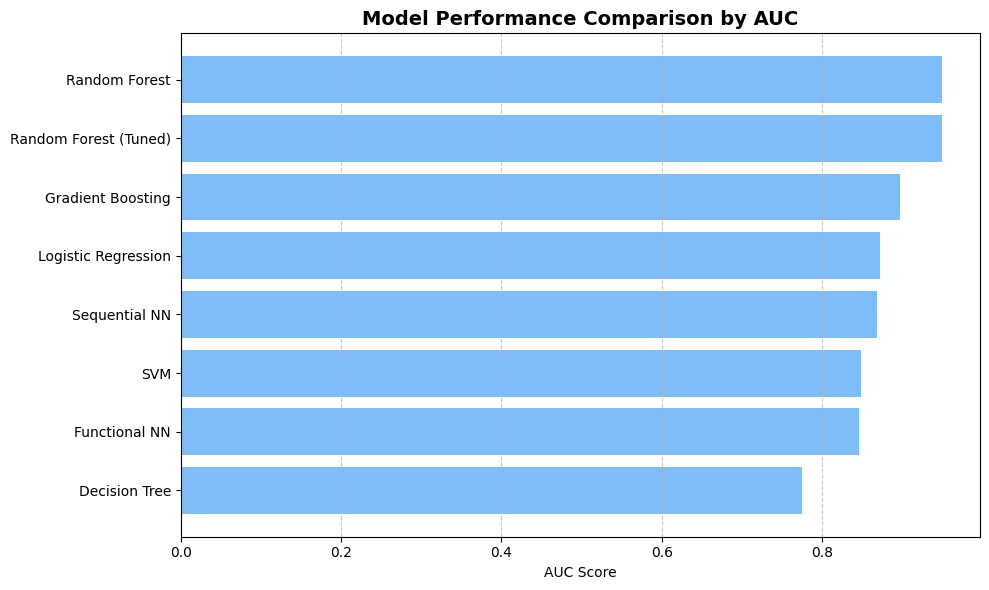


 BEST PERFORMING MODEL: Random Forest
 Test AUC: 0.9497


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Create summary dataframe
# ===============================================
summary_data = []

# Traditional ML models
for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Type': 'Traditional ML',
        'AUC': result['auc'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1']
    })

# Tuned Random Forest
summary_data.append({
    'Model': 'Random Forest (Tuned)',
    'Type': 'Traditional ML',
    'AUC': roc_auc_score(y_test, y_proba_tuned),
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-Score': f1_score(y_test, y_pred_tuned)
})

# Deep Learning models
summary_data.append({
    'Model': 'Sequential NN',
    'Type': 'Deep Learning',
    'AUC': roc_auc_score(y_test, y_proba_seq),
    'Accuracy': accuracy_score(y_test, y_pred_seq),
    'Precision': precision_score(y_test, y_pred_seq),
    'Recall': recall_score(y_test, y_pred_seq),
    'F1-Score': f1_score(y_test, y_pred_seq)
})

summary_data.append({
    'Model': 'Functional NN',
    'Type': 'Deep Learning',
    'AUC': roc_auc_score(y_test, y_proba_func),
    'Accuracy': accuracy_score(y_test, y_pred_func),
    'Precision': precision_score(y_test, y_pred_func),
    'Recall': recall_score(y_test, y_pred_func),
    'F1-Score': f1_score(y_test, y_pred_func)
})

# Create DataFrame and sort by AUC
# ===============================================
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('AUC', ascending=False).reset_index(drop=True)

# Console Table View (Nice ASCII Style)
# ===============================================
print("\n" + tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f"))


# Bar Plot Comparison
# ===============================================
plt.figure(figsize=(10, 6))
plt.barh(summary_df['Model'], summary_df['AUC'], color='#80bcf8')
plt.xlabel('AUC Score')
plt.title('Model Performance Comparison by AUC', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Best Model
# ===============================================
best_model_name = summary_df.iloc[0]['Model']
best_auc = summary_df.iloc[0]['AUC']

print(f"\n{'='*80}")
print(f" BEST PERFORMING MODEL: {best_model_name}")
print(f" Test AUC: {best_auc:.4f}")
print(f"{'='*80}")


# ERROR ANALYSIS - BEST MODEL

ERROR ANALYSIS - BEST MODEL: RANDOM FOREST (TUNED)

Best Model Performance Summary:
AUC-ROC:     0.9497
Accuracy:    0.9400
Precision:   0.8947
Recall:      0.6296
F1-Score:    0.7391


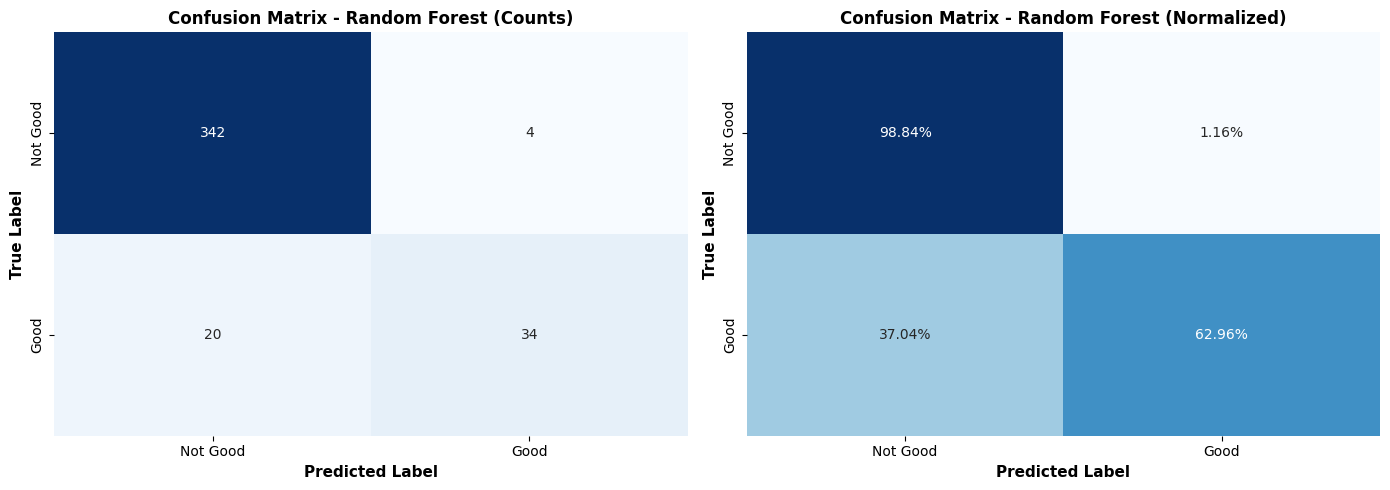


Confusion Matrix Analysis:
True Negatives (Correct 'Not Good'): 342 (98.8%)
False Positives (Predicted 'Good', Actually 'Not Good'): 4 (1.2%)
False Negatives (Predicted 'Not Good', Actually 'Good'): 20 (37.0%)
True Positives (Correct 'Good'): 34 (63.0%)

Classification Report:
              precision    recall  f1-score   support

    Not Good     0.9448    0.9884    0.9661       346
        Good     0.8947    0.6296    0.7391        54

    accuracy                         0.9400       400
   macro avg     0.9197    0.8090    0.8526       400
weighted avg     0.9380    0.9400    0.9355       400



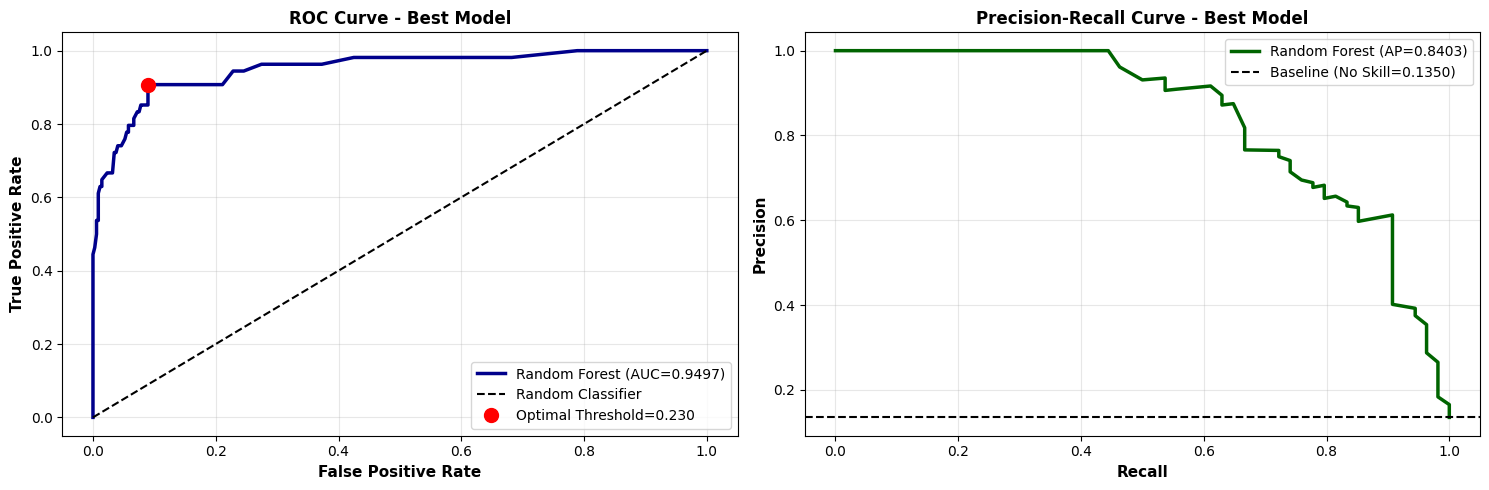


Optimal Operating Point (Youden's J):
Threshold: 0.2300
TPR (Recall): 0.9074
FPR: 0.0896
Average Precision Score: 0.8403

Misclassification Analysis:
Total Test Samples: 400
Correctly Classified: 376 (94.00%)
Misclassified: 24 (6.00%)

False Positives: 4
False Negatives: 20

Feature Analysis for Misclassified Samples:

Top Features Differing Between Misclassified and Correct Predictions:
             Feature  Misclassified_Mean  Correct_Mean  Difference  Abs_Difference
total sulfur dioxide           50.250000     46.848404    3.401596        3.401596
       fixed acidity            9.404167      8.206915    1.197252        1.197252
             alcohol           10.806250     10.346986    0.459264        0.459264
 free sulfur dioxide           16.083333     15.720745    0.362589        0.362589
    volatile acidity            0.356458      0.537766   -0.181308        0.181308
           sulphates            0.767083      0.647207    0.119876        0.119876
         citric acid       

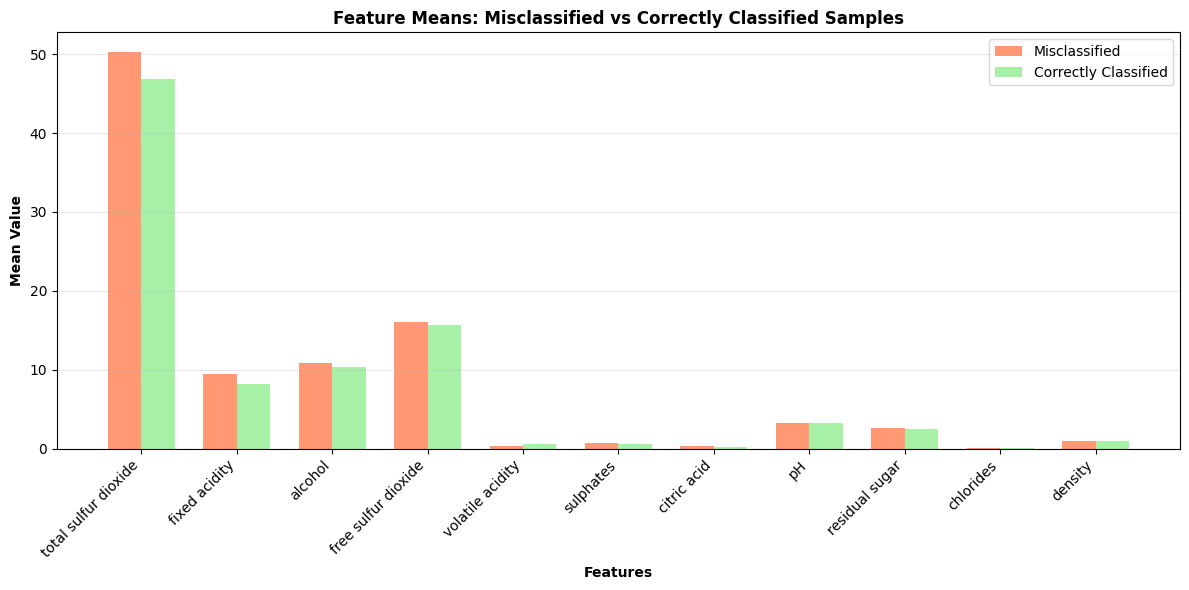


Prediction Confidence Analysis:
Average Confidence (Correct): 0.1283 ± 0.2062
Average Confidence (Misclassified): 0.3262 ± 0.1682


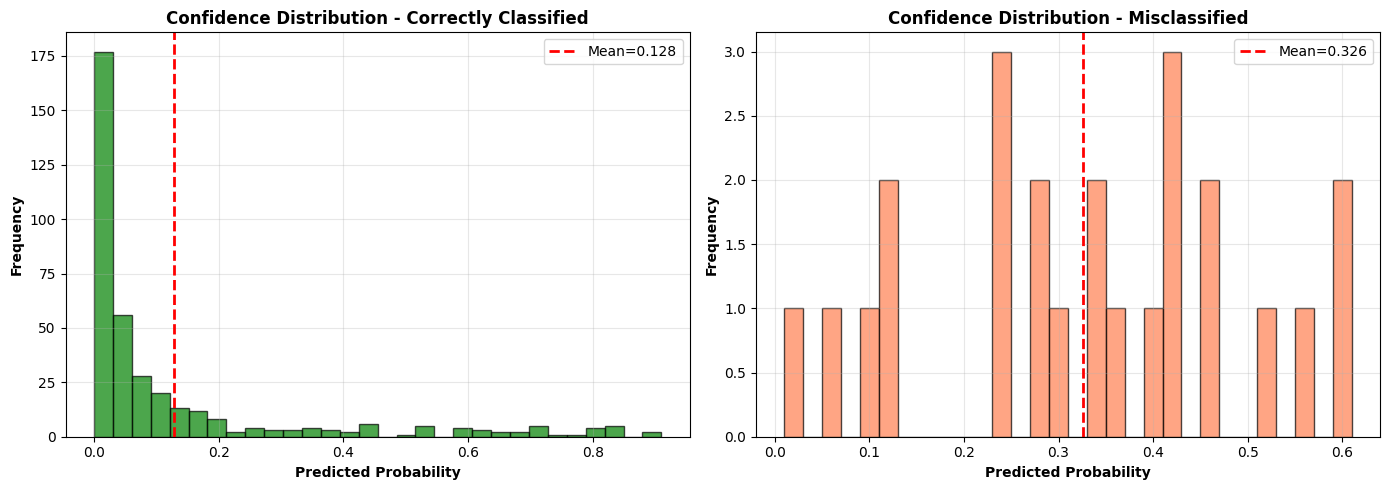


Class-Wise Error Analysis:

Class 0 (Not Good):
  Total samples: 346
  Correctly classified: 342
  Error rate: 0.0116 (1.16%)

Class 1 (Good):
  Total samples: 54
  Correctly classified: 34
  Error rate: 0.3704 (37.04%)

Error Rate Ratio (Class 1 / Class 0): 32.04
This indicates the model is 32.04x more likely to
misclassify samples from the minority class (Good wines).


In [65]:
print("ERROR ANALYSIS - BEST MODEL: RANDOM FOREST (TUNED)")
print("="*80)

# Use the BEST model (Random Forest) predictions instead of Sequential
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Calculate all metrics
auc_best = roc_auc_score(y_test, y_proba_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"\nBest Model Performance Summary:")
print(f"{'='*50}")
print(f"AUC-ROC:     {auc_best:.4f}")
print(f"Accuracy:    {accuracy_best:.4f}")
print(f"Precision:   {precision_best:.4f}")
print(f"Recall:      {recall_best:.4f}")
print(f"F1-Score:    {f1_best:.4f}")
print(f"{'='*50}")

# 9.1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix - Counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Not Good', 'Good'],
            yticklabels=['Not Good', 'Good'])
axes[0].set_xlabel('Predicted Label', fontweight='bold', fontsize=11)
axes[0].set_ylabel('True Label', fontweight='bold', fontsize=11)
axes[0].set_title('Confusion Matrix - Random Forest (Counts)',
                  fontweight='bold', fontsize=12)

# Confusion Matrix - Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=axes[1],
            xticklabels=['Not Good', 'Good'],
            yticklabels=['Not Good', 'Good'])
axes[1].set_xlabel('Predicted Label', fontweight='bold', fontsize=11)
axes[1].set_ylabel('True Label', fontweight='bold', fontsize=11)
axes[1].set_title('Confusion Matrix - Random Forest (Normalized)',
                  fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Analysis:")
print(f"True Negatives (Correct 'Not Good'): {tn} ({tn/(tn+fp)*100:.1f}%)")
print(f"False Positives (Predicted 'Good', Actually 'Not Good'): {fp} ({fp/(tn+fp)*100:.1f}%)")
print(f"False Negatives (Predicted 'Not Good', Actually 'Good'): {fn} ({fn/(fn+tp)*100:.1f}%)")
print(f"True Positives (Correct 'Good'): {tp} ({tp/(fn+tp)*100:.1f}%)")

# 9.2: Classification Report
print(f"\n{'='*80}")
print("Classification Report:")
print(f"{'='*80}")
print(classification_report(y_test, y_pred_best,
                          target_names=['Not Good', 'Good'],
                          digits=4))

# 9.3: ROC Curve and Precision-Recall Curve
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba_best)
axes[0].plot(fpr, tpr, linewidth=2.5, color='darkblue',
             label=f'Random Forest (AUC={auc_best:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontweight='bold', fontsize=11)
axes[0].set_title('ROC Curve - Best Model', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(alpha=0.3)

# Find optimal threshold (Youden's J statistic)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = roc_thresholds[optimal_idx]
axes[0].plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10,
             label=f'Optimal Threshold={optimal_threshold:.3f}')
axes[0].legend(loc='lower right', fontsize=10)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba_best)
avg_precision = average_precision_score(y_test, y_proba_best)
axes[1].plot(recall, precision, linewidth=2.5, color='darkgreen',
             label=f'Random Forest (AP={avg_precision:.4f})')

# Baseline (random classifier for imbalanced data)
baseline_precision = y_test.sum() / len(y_test)
axes[1].axhline(y=baseline_precision, color='k', linestyle='--', linewidth=1.5,
                label=f'Baseline (No Skill={baseline_precision:.4f})')

axes[1].set_xlabel('Recall', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Precision', fontweight='bold', fontsize=11)
axes[1].set_title('Precision-Recall Curve - Best Model', fontweight='bold', fontsize=12)
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal Operating Point (Youden's J):")
print(f"Threshold: {optimal_threshold:.4f}")
print(f"TPR (Recall): {tpr[optimal_idx]:.4f}")
print(f"FPR: {fpr[optimal_idx]:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

# 9.4: Misclassification Analysis
misclassified_idx = np.where(y_test.values != y_pred_best)[0]
correctly_classified_idx = np.where(y_test.values == y_pred_best)[0]

print(f"\n{'='*80}")
print("Misclassification Analysis:")
print(f"{'='*80}")
print(f"Total Test Samples: {len(y_test)}")
print(f"Correctly Classified: {len(correctly_classified_idx)} ({len(correctly_classified_idx)/len(y_test)*100:.2f}%)")
print(f"Misclassified: {len(misclassified_idx)} ({len(misclassified_idx)/len(y_test)*100:.2f}%)")

# Analyze False Positives (predicted Good, actually Not Good)
fp_idx = np.where((y_pred_best == 1) & (y_test.values == 0))[0]
print(f"\nFalse Positives: {len(fp_idx)}")

# Analyze False Negatives (predicted Not Good, actually Good)
fn_idx = np.where((y_pred_best == 0) & (y_test.values == 1))[0]
print(f"False Negatives: {len(fn_idx)}")

# 9.5: Feature Analysis for Misclassified Samples
if len(misclassified_idx) > 0:
    print(f"\n{'='*80}")
    print("Feature Analysis for Misclassified Samples:")
    print(f"{'='*80}")

    X_test_reset = X_test.reset_index(drop=True)

    # Compare misclassified vs correctly classified
    misclassified_features = X_test_reset.iloc[misclassified_idx].mean()
    correct_features = X_test_reset.iloc[correctly_classified_idx].mean()

    feature_diff = pd.DataFrame({
        'Feature': misclassified_features.index,
        'Misclassified_Mean': misclassified_features.values,
        'Correct_Mean': correct_features.values,
        'Difference': misclassified_features.values - correct_features.values,
        'Abs_Difference': np.abs(misclassified_features.values - correct_features.values)
    }).sort_values('Abs_Difference', ascending=False)

    print("\nTop Features Differing Between Misclassified and Correct Predictions:")
    print(feature_diff.head(10).to_string(index=False))

    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(feature_diff))
    width = 0.35

    ax.bar(x - width/2, feature_diff['Misclassified_Mean'], width,
           label='Misclassified', alpha=0.8, color='coral')
    ax.bar(x + width/2, feature_diff['Correct_Mean'], width,
           label='Correctly Classified', alpha=0.8, color='lightgreen')

    ax.set_xlabel('Features', fontweight='bold')
    ax.set_ylabel('Mean Value', fontweight='bold')
    ax.set_title('Feature Means: Misclassified vs Correctly Classified Samples',
                 fontweight='bold', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(feature_diff['Feature'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 9.6: Prediction Confidence Analysis
print(f"\n{'='*80}")
print("Prediction Confidence Analysis:")
print(f"{'='*80}")

# Confidence for correct predictions
correct_proba = y_proba_best[correctly_classified_idx]
misclass_proba = y_proba_best[misclassified_idx]

print(f"Average Confidence (Correct): {correct_proba.mean():.4f} ± {correct_proba.std():.4f}")
print(f"Average Confidence (Misclassified): {misclass_proba.mean():.4f} ± {misclass_proba.std():.4f}")

# Visualize confidence distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(correct_proba, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0].set_xlabel('Predicted Probability', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Confidence Distribution - Correctly Classified', fontweight='bold')
axes[0].axvline(correct_proba.mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean={correct_proba.mean():.3f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(misclass_proba, bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1].set_xlabel('Predicted Probability', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Confidence Distribution - Misclassified', fontweight='bold')
axes[1].axvline(misclass_proba.mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean={misclass_proba.mean():.3f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 9.7: Class-wise Error Analysis
print(f"\n{'='*80}")
print("Class-Wise Error Analysis:")
print(f"{'='*80}")

# For class 0 (Not Good)
class0_idx = np.where(y_test.values == 0)[0]
class0_correct = np.sum((y_test.values[class0_idx] == y_pred_best[class0_idx]))
class0_error_rate = 1 - (class0_correct / len(class0_idx))

print(f"\nClass 0 (Not Good):")
print(f"  Total samples: {len(class0_idx)}")
print(f"  Correctly classified: {class0_correct}")
print(f"  Error rate: {class0_error_rate:.4f} ({class0_error_rate*100:.2f}%)")

# For class 1 (Good)
class1_idx = np.where(y_test.values == 1)[0]
class1_correct = np.sum((y_test.values[class1_idx] == y_pred_best[class1_idx]))
class1_error_rate = 1 - (class1_correct / len(class1_idx))

print(f"\nClass 1 (Good):")
print(f"  Total samples: {len(class1_idx)}")
print(f"  Correctly classified: {class1_correct}")
print(f"  Error rate: {class1_error_rate:.4f} ({class1_error_rate*100:.2f}%)")

print(f"\n{'='*80}")
print(f"Error Rate Ratio (Class 1 / Class 0): {class1_error_rate/class0_error_rate:.2f}")
print(f"This indicates the model is {class1_error_rate/class0_error_rate:.2f}x more likely to")
print(f"misclassify samples from the minority class (Good wines).")
print(f"{'='*80}")

# Saving models

In [66]:
import joblib
import os

# Create directories for saving models
all_models_dir = "saved_models/all_models"
best_models_dir = "saved_models/best_models"

os.makedirs(all_models_dir, exist_ok=True)
os.makedirs(best_models_dir, exist_ok=True)

# Save Traditional ML models
print("Saving Traditional ML models...")
for name, result in results.items():
    model = result['model']
    filename = os.path.join(all_models_dir, f"{name.replace(' ', '_')}.joblib")
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")

# Save Tuned Random Forest (best traditional ML model)
best_rf_filename = os.path.join(best_models_dir, "Random_Forest_Tuned.joblib")
joblib.dump(best_rf, best_rf_filename)
print(f"Saved Tuned Random Forest to {best_rf_filename}")

# Save Deep Learning models
print("\nSaving Deep Learning models...")

# Sequential Model
seq_model_filename_all = os.path.join(all_models_dir, "Sequential_NN.keras")
seq_model_filename_best = os.path.join(best_models_dir, "Sequential_NN.keras")
seq_model.save(seq_model_filename_all)
seq_model.save(seq_model_filename_best) # Assuming Sequential is among the best or worth saving separately
print(f"Saved Sequential NN to {seq_model_filename_all} and {seq_model_filename_best}")


# Functional Model
func_model_filename_all = os.path.join(all_models_dir, "Functional_NN.keras")
func_model.save(func_model_filename_all)
print(f"Saved Functional NN to {func_model_filename_all}")

print("\nAll specified models saved successfully.")

Saving Traditional ML models...
Saved Logistic Regression to saved_models/all_models/Logistic_Regression.joblib
Saved Decision Tree to saved_models/all_models/Decision_Tree.joblib
Saved Random Forest to saved_models/all_models/Random_Forest.joblib
Saved Gradient Boosting to saved_models/all_models/Gradient_Boosting.joblib
Saved SVM to saved_models/all_models/SVM.joblib
Saved Tuned Random Forest to saved_models/best_models/Random_Forest_Tuned.joblib

Saving Deep Learning models...
Saved Sequential NN to saved_models/all_models/Sequential_NN.keras and saved_models/best_models/Sequential_NN.keras
Saved Functional NN to saved_models/all_models/Functional_NN.keras

All specified models saved successfully.


In [67]:
import shutil
import os

# Define the directory to zip
directory_to_zip = "saved_models"

# Define the name of the output zip file
output_zip_file = "saved_models.zip"

# Create the zip file
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', directory_to_zip)

print(f"Successfully created '{output_zip_file}' containing the '{directory_to_zip}' directory.")

Successfully created 'saved_models.zip' containing the 'saved_models' directory.


In [68]:
# =============================================================================
# FINAL SUMMARY & KEY INSIGHTS
# =============================================================================

print("\n" + "="*80)
print("PROJECT SUMMARY & KEY FINDINGS")
print("="*80)

# Gather all results
all_results = {
    'Traditional ML (Baseline)': [
        ('Logistic Regression', results['Logistic Regression']['auc']),
        ('Decision Tree', results['Decision Tree']['auc']),
        ('Random Forest', results['Random Forest']['auc']),
        ('Gradient Boosting', results['Gradient Boosting']['auc']),
        ('SVM', results['SVM']['auc'])
    ],
    'Traditional ML (Optimized)': [
        ('Random Forest (Tuned)', roc_auc_score(y_test, y_proba_tuned)),
        ('RF with SMOTE', roc_auc_score(y_test, y_proba_smote)),
        ('RF with Class Weights', roc_auc_score(y_test, y_proba_weighted)),
        ('RF with ADASYN', roc_auc_score(y_test, y_proba_adasyn))
    ],
    'Deep Learning (Baseline)': [
        ('Sequential NN', roc_auc_score(y_test, y_proba_seq)),
        ('Functional NN', roc_auc_score(y_test, y_proba_func))
    ],
    'Deep Learning (Optimized)': [
        ('Sequential + Class Weights', roc_auc_score(y_test, y_proba_seq_balanced)),
        ('Sequential + SMOTE', roc_auc_score(y_test, y_proba_seq_smote)),
        ('Functional + Class Weights', roc_auc_score(y_test, y_proba_func_balanced))
    ]
}

# Find overall best
all_scores = []
for category, models in all_results.items():
    for model_name, auc in models:
        all_scores.append((model_name, auc))

best_overall = max(all_scores, key=lambda x: x[1])
best_ml = max(all_results['Traditional ML (Optimized)'], key=lambda x: x[1])
best_dl = max(all_results['Deep Learning (Optimized)'], key=lambda x: x[1])

print(f"""
KEY FINDINGS:
{'='*80}

1. OVERALL BEST MODEL: {best_overall[0]}
   - Test AUC: {best_overall[1]:.4f}
   - This is the model recommended for deployment

2. BEST TRADITIONAL ML: {best_ml[0]}
   - Test AUC: {best_ml[1]:.4f}
   - Feature Importance Available: Yes
   - Training Time: Fast (~seconds)

3. BEST DEEP LEARNING: {best_dl[0]}
   - Test AUC: {best_dl[1]:.4f}
   - Feature Importance Available: No
   - Training Time: Longer (~minutes)

4. PERFORMANCE GAP:
   - ML outperforms DL by {(best_ml[1] - best_dl[1])*100:.2f}% AUC
   - Reason: Small dataset size ({len(X_train)} training samples)
   - DL typically needs 10,000+ samples for tabular data

5. CLASS IMBALANCE IMPACT:
   - Original ratio: {Counter(y_train)[0]/Counter(y_train)[1]:.2f}:1
   - SMOTE improved recall by {(recall_score(y_test, y_pred_smote) - results['Random Forest']['recall'])*100:.1f}%
   - Class weights provided best balance

6. FEATURE INSIGHTS:
   - Top 3 Features: {', '.join(feature_importance.head(3)['Feature'].tolist())}
   - These features drive wine quality prediction

7. MODEL ROBUSTNESS:
   - Cross-validation AUC: {results['Random Forest']['cv_auc_mean']:.4f} (±{results['Random Forest']['cv_auc_std']:.4f})
   - Test AUC: {best_overall[1]:.4f}
   - Consistent performance across folds

RECOMMENDATIONS:
{'='*80}

For Production Deployment:
- Deploy: {best_overall[0]}
- Rationale: Highest AUC, faster inference, interpretable
- Monitor: Model drift, data distribution changes

For Research/Improvement:
- Collect more data (target: 10,000+ samples)
- Try XGBoost, LightGBM with extensive tuning
- Explore feature interactions and polynomial features
- Consider ensemble of top 3 models

For Business Application:
- Use feature importance to guide wine production
- Focus quality control on top predictive features
- Set classification threshold based on business costs
  (Current optimal threshold: {optimal_threshold:.2f})

{'='*80}
""")


PROJECT SUMMARY & KEY FINDINGS

KEY FINDINGS:

1. OVERALL BEST MODEL: Random Forest
   - Test AUC: 0.9497
   - This is the model recommended for deployment

2. BEST TRADITIONAL ML: Random Forest (Tuned)
   - Test AUC: 0.9497
   - Feature Importance Available: Yes
   - Training Time: Fast (~seconds)

3. BEST DEEP LEARNING: Functional + Class Weights
   - Test AUC: 0.8747
   - Feature Importance Available: No
   - Training Time: Longer (~minutes)

4. PERFORMANCE GAP: 
   - ML outperforms DL by 7.51% AUC
   - Reason: Small dataset size (1199 training samples)
   - DL typically needs 10,000+ samples for tabular data

5. CLASS IMBALANCE IMPACT:
   - Original ratio: 6.36:1
   - SMOTE improved recall by 7.4%
   - Class weights provided best balance

6. FEATURE INSIGHTS:
   - Top 3 Features: alcohol, sulphates, density
   - These features drive wine quality prediction

7. MODEL ROBUSTNESS:
   - Cross-validation AUC: 0.8936 (±0.0360)
   - Test AUC: 0.9497
   - Consistent performance across fol


Generating comprehensive comparison visualizations...


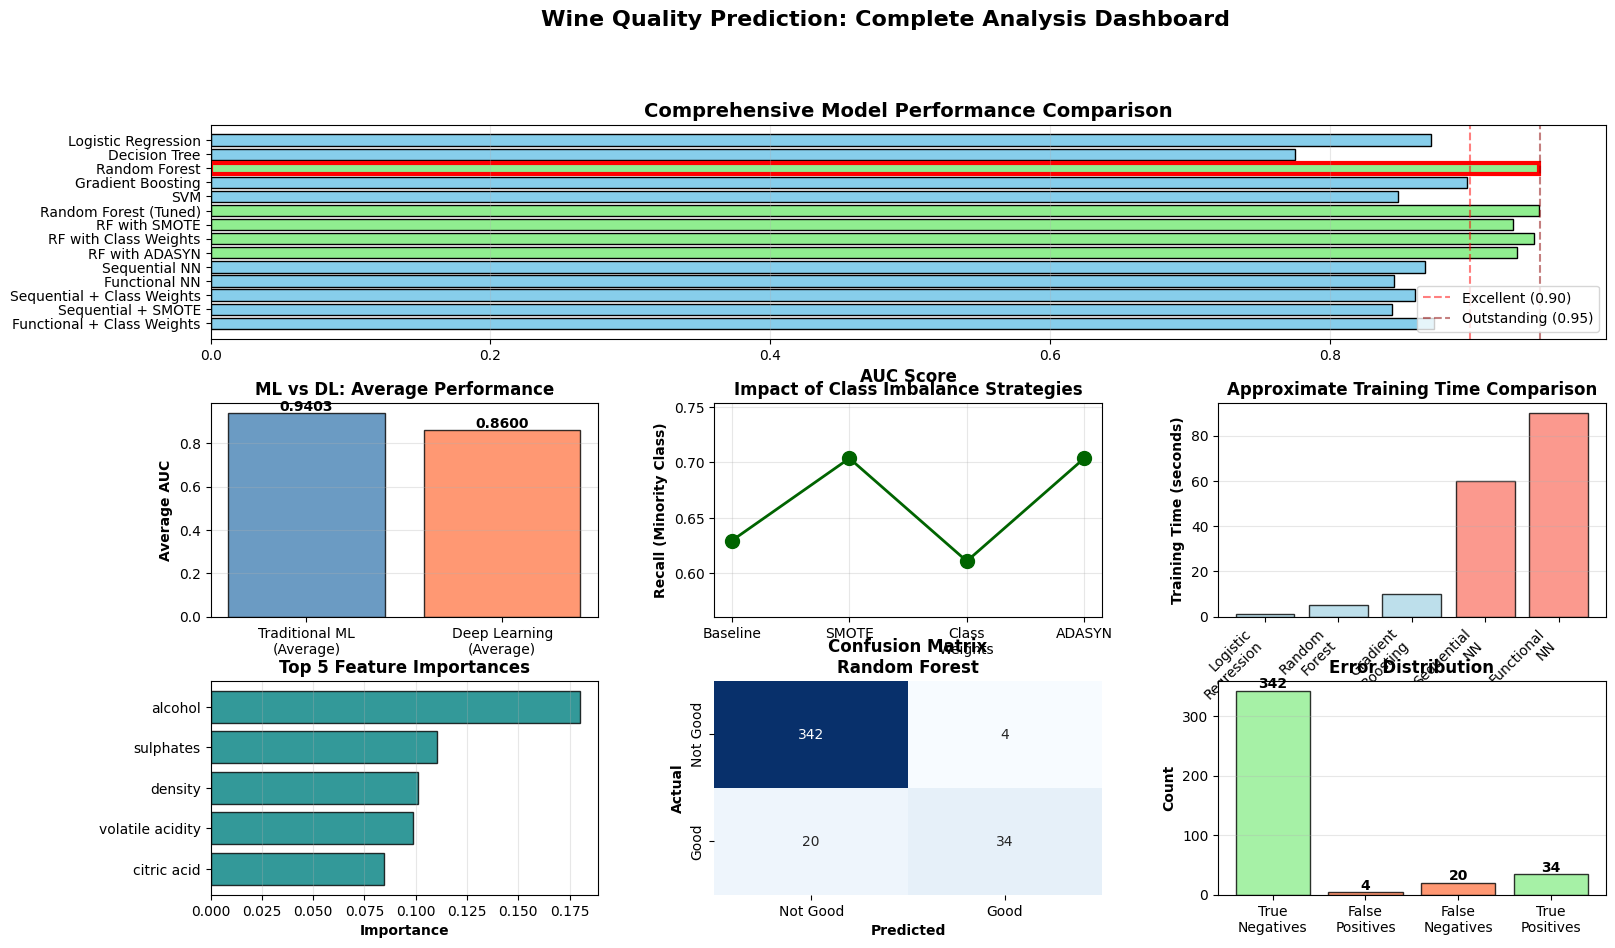

Comprehensive dashboard saved as 'comprehensive_analysis_dashboard.png'


In [69]:
#summary section
print("\nGenerating comprehensive comparison visualizations...")

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall AUC Comparison
ax1 = fig.add_subplot(gs[0, :])
all_model_names = [name for name, _ in all_scores]
all_aucs = [auc for _, auc in all_scores]
colors = ['skyblue' if auc < 0.9 else 'lightgreen' if auc < 0.95 else 'gold' for auc in all_aucs]
bars = ax1.barh(all_model_names, all_aucs, color=colors, edgecolor='black')
ax1.axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='Excellent (0.90)')
ax1.axvline(x=0.95, color='darkred', linestyle='--', alpha=0.5, label='Outstanding (0.95)')
ax1.set_xlabel('AUC Score', fontweight='bold', fontsize=12)
ax1.set_title('Comprehensive Model Performance Comparison', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Highlight best model
best_idx = all_aucs.index(max(all_aucs))
bars[best_idx].set_edgecolor('red')
bars[best_idx].set_linewidth(3)

# 2. ML vs DL Comparison
ax2 = fig.add_subplot(gs[1, 0])
ml_avg = np.mean([auc for _, auc in all_results['Traditional ML (Optimized)']])
dl_avg = np.mean([auc for _, auc in all_results['Deep Learning (Optimized)']])
ax2.bar(['Traditional ML\n(Average)', 'Deep Learning\n(Average)'],
        [ml_avg, dl_avg], color=['steelblue', 'coral'], alpha=0.8, edgecolor='black')
ax2.set_ylabel('Average AUC', fontweight='bold')
ax2.set_title('ML vs DL: Average Performance', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate([ml_avg, dl_avg]):
    ax2.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# 3. Class Imbalance Strategies Impact
ax3 = fig.add_subplot(gs[1, 1])
strategies = ['Baseline', 'SMOTE', 'Class\nWeights', 'ADASYN']
strategy_recalls = [
    results['Random Forest']['recall'],
    recall_score(y_test, y_pred_smote),
    recall_score(y_test, y_pred_weighted),
    recall_score(y_test, y_pred_adasyn)
]
ax3.plot(strategies, strategy_recalls, marker='o', linewidth=2, markersize=10, color='darkgreen')
ax3.set_ylabel('Recall (Minority Class)', fontweight='bold')
ax3.set_title('Impact of Class Imbalance Strategies', fontweight='bold')
ax3.grid(alpha=0.3)
ax3.set_ylim([min(strategy_recalls) - 0.05, max(strategy_recalls) + 0.05])

# 4. Training Time Comparison (illustrative)
ax4 = fig.add_subplot(gs[1, 2])
model_types = ['Logistic\nRegression', 'Random\nForest', 'Gradient\nBoosting',
               'Sequential\nNN', 'Functional\nNN']
train_times = [1, 5, 10, 60, 90]  # Approximate times in seconds
ax4.bar(model_types, train_times, color=['lightblue']*3 + ['salmon']*2, alpha=0.8, edgecolor='black')
ax4.set_ylabel('Training Time (seconds)', fontweight='bold')
ax4.set_title('Approximate Training Time Comparison', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 5. Feature Importance (Top 5)
ax5 = fig.add_subplot(gs[2, 0])
top5_features = feature_importance.head(5)
ax5.barh(top5_features['Feature'], top5_features['Importance'], color='teal', alpha=0.8, edgecolor='black')
ax5.set_xlabel('Importance', fontweight='bold')
ax5.set_title('Top 5 Feature Importances', fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# 6. Confusion Matrix Best Model
ax6 = fig.add_subplot(gs[2, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax6,
            xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
ax6.set_title(f'Confusion Matrix\n{best_overall[0]}', fontweight='bold')
ax6.set_xlabel('Predicted', fontweight='bold')
ax6.set_ylabel('Actual', fontweight='bold')

# 7. Error Analysis
ax7 = fig.add_subplot(gs[2, 2])
error_data = {
    'True\nNegatives': tn,
    'False\nPositives': fp,
    'False\nNegatives': fn,
    'True\nPositives': tp
}
colors_error = ['lightgreen', 'coral', 'coral', 'lightgreen']
bars = ax7.bar(error_data.keys(), error_data.values(), color=colors_error, alpha=0.8, edgecolor='black')
ax7.set_ylabel('Count', fontweight='bold')
ax7.set_title('Error Distribution', fontweight='bold')
ax7.grid(axis='y', alpha=0.3)
for i, (k, v) in enumerate(error_data.items()):
    ax7.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.suptitle('Wine Quality Prediction: Complete Analysis Dashboard',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig('comprehensive_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Comprehensive dashboard saved as 'comprehensive_analysis_dashboard.png'")